## EDA + Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
import os
import pandas as pd
for dirname, _, filenames in os.walk('C:/Users/brajesh/Downloads/healthcare-provider-fraud-detection-main/archive'):
    for filename in filenames:
        print(filename)

Test-1542969243754.csv
Test_Beneficiarydata-1542969243754.csv
Test_Inpatientdata-1542969243754.csv
Test_Outpatientdata-1542969243754.csv
Train-1542865627584.csv
Train_Beneficiarydata-1542865627584.csv
Train_Inpatientdata-1542865627584.csv
Train_Outpatientdata-1542865627584.csv


In [3]:
# Function to load the inputs dataset
def read_data(tp = "Train", N = 1542865627584):
    path1="C:/Users/brajesh/Downloads/healthcare-provider-fraud-detection-main/archive"
    target = pd.read_csv(path1 + "/{}-{}.csv".format(tp.title(), N))
    pt = pd.read_csv(path1 + "/{}_Beneficiarydata-{}.csv".format(tp.title(), N))
    in_pt = pd.read_csv(path1 + "/{}_Inpatientdata-{}.csv".format(tp.title(), N))
    out_pt = pd.read_csv(path1 + "/{}_Outpatientdata-{}.csv".format(tp.title(), N))
    return(in_pt, out_pt, pt, target)

### Load Train data
train_in_pt, train_out_pt, train_ben, train_target = read_data()

Train_Inpatient=train_in_pt
Train_Outpatient=train_out_pt
Train_Beneficiary=train_ben
Train=train_target


In [4]:
# Function to load the inputs dataset
def read_data(tp = "Test", N = 1542969243754):
    path1="C:/Users/brajesh/Downloads/healthcare-provider-fraud-detection-main/archive"
    target = pd.read_csv(path1 + "/{}-{}.csv".format(tp.title(), N))
    pt = pd.read_csv(path1 + "/{}_Beneficiarydata-{}.csv".format(tp.title(), N))
    in_pt = pd.read_csv(path1 + "/{}_Inpatientdata-{}.csv".format(tp.title(), N))
    out_pt = pd.read_csv(path1 + "/{}_Outpatientdata-{}.csv".format(tp.title(), N))
    return(in_pt, out_pt, pt, target)

### Load Test data
test_in_pt, test_out_pt, test_ben, test_target = read_data()

Test_Inpatient=test_in_pt
Test_Outpatient=test_out_pt
Test_Beneficiary=test_ben
Test=test_target


In [5]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

## Analyze Train/Test Data (Class labels)

In [6]:
Train.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


#### I am plotting the below plot to check the distribution of the class label. <br> For that I plotted count plot of fraudulent and non fraudulent class labels.

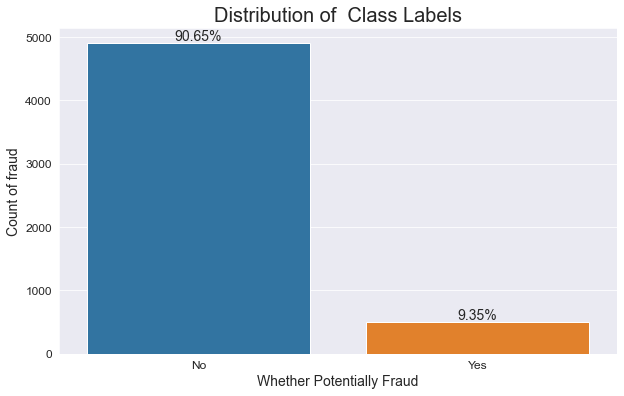

In [7]:
# Check distribution of potential Fraudulent providers
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.countplot(x='PotentialFraud',data=Train)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Distribution of  Class Labels', fontsize=20)
plt.xlabel('Whether Potentially Fraud', size = 14)
plt.ylabel('Count of fraud', size = 14)
percentage_without_hue(ax, Train['PotentialFraud'], 0,40,14)

### Observation:
This is an highly imbalanced dataset. There are 10% fraudulent providers and 90% non-fraudulent providers.

## Analyze Train_Beneficiary/Test_Beneficiary Data

In [8]:
# display all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [9]:
Train_Beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1/1/1943,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,9/1/1936,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [10]:
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

Train_Beneficiary = Train_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
Train_Beneficiary = Train_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiary = Test_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiary = Test_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [11]:
# convert all these columns datatypes to numeric
Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

In [12]:
# calculate patient risk score by summing up all the chronic conditions.
# The higher risk score indicates the health of the patient is not good

Train_Beneficiary['Patient_Risk_Score'] = Train_Beneficiary['ChronicCond_Alzheimer'] + Train_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Train_Beneficiary['ChronicCond_KidneyDisease'] + Train_Beneficiary['ChronicCond_Cancer'] +\
                                        Train_Beneficiary['ChronicCond_ObstrPulmonary'] + Train_Beneficiary['ChronicCond_Depression'] +\
                                    Train_Beneficiary['ChronicCond_Diabetes'] + Train_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Train_Beneficiary['ChronicCond_Osteoporasis'] + Train_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Train_Beneficiary['ChronicCond_stroke'] + Train_Beneficiary['RenalDiseaseIndicator'] 

# calculate patient risk score by summing up all risk scores
Test_Beneficiary['Patient_Risk_Score'] = Test_Beneficiary['ChronicCond_Alzheimer'] + Test_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Test_Beneficiary['ChronicCond_KidneyDisease'] + Test_Beneficiary['ChronicCond_Cancer'] +\
                                        Test_Beneficiary['ChronicCond_ObstrPulmonary'] + Test_Beneficiary['ChronicCond_Depression'] +\
                                    Test_Beneficiary['ChronicCond_Diabetes'] + Test_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Test_Beneficiary['ChronicCond_Osteoporasis'] + Test_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Test_Beneficiary['ChronicCond_stroke'] + Test_Beneficiary['RenalDiseaseIndicator'] 

In [13]:
# Replacing '2' with '0' for Gender Type
Train_Beneficiary = Train_Beneficiary.replace({'Gender': 2}, 0)

Test_Beneficiary = Test_Beneficiary.replace({'Gender': 2}, 0)

#### Plotting the distribution of Gender in Beneficiary Data. Plotted countplot of Gender.

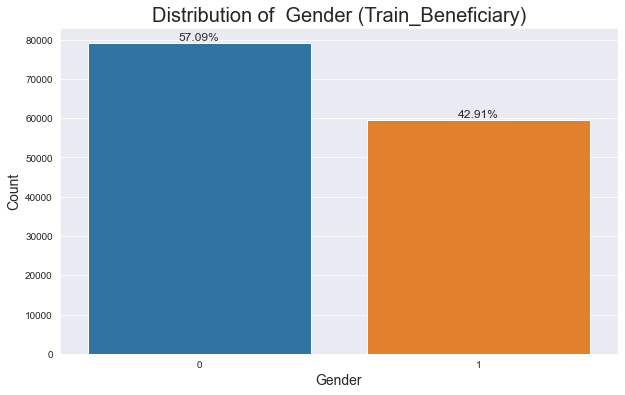

In [14]:
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender',data=Train_Beneficiary, order = Train_Beneficiary['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of  Gender (Train_Beneficiary)', fontsize=20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Gender'], 0,800,12)


### Observation:
The ratio of genders in beneficiary data is Gender_0 : Gender1 = 57% : 43%.

#### Plotting top 20 States in terms of beneficiary count

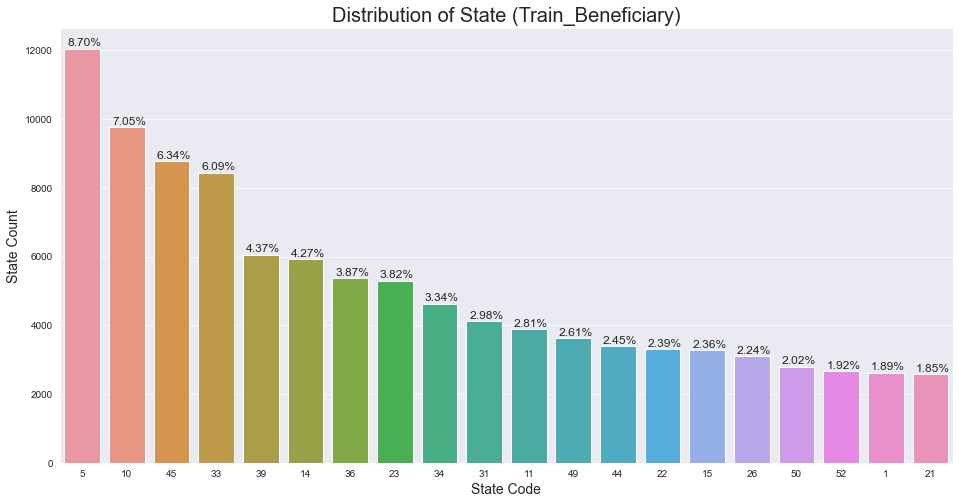

In [15]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='State',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['State'].value_counts().head(20).index)
plt.title('Distribution of State (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('State Code', size = 14)
plt.ylabel('State Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['State'], 0.05, 80,12)

### Observation:
1. Top 20 states in terms of beneficiary count are shown in the above pic.
2. States with code 5, 10, 45, 33 and 39 are the top 5 states.
3. 8.7% of the beneficiaries belongs to state 5

#### Plotting top 20 Countries in terms of beneficiary count

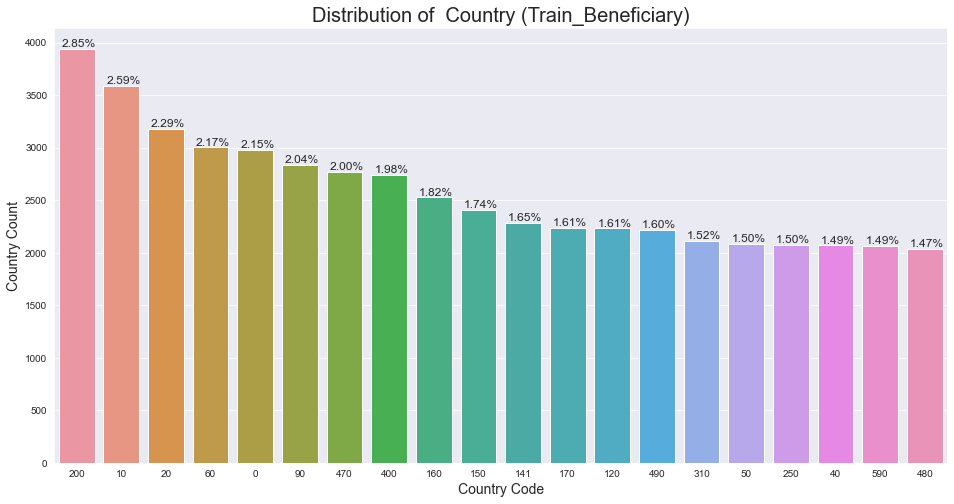

In [16]:
# Plot top 20 Country from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='County',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['County'].value_counts().head(20).index)
plt.title('Distribution of  Country (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Country Code', size = 14)
plt.ylabel('Country Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['County'], 0.05, 20,12)

### Observation:
1. Top 20 countries in terms of beneficiary count are shown in the above pic.
2. Countries with code 200, 10, 20, 60 and 0 are the top 5 states.
3. 2.85% of the beneficiaries belongs to country code 200

#### Plotting countplot of Race in the beneficiary data

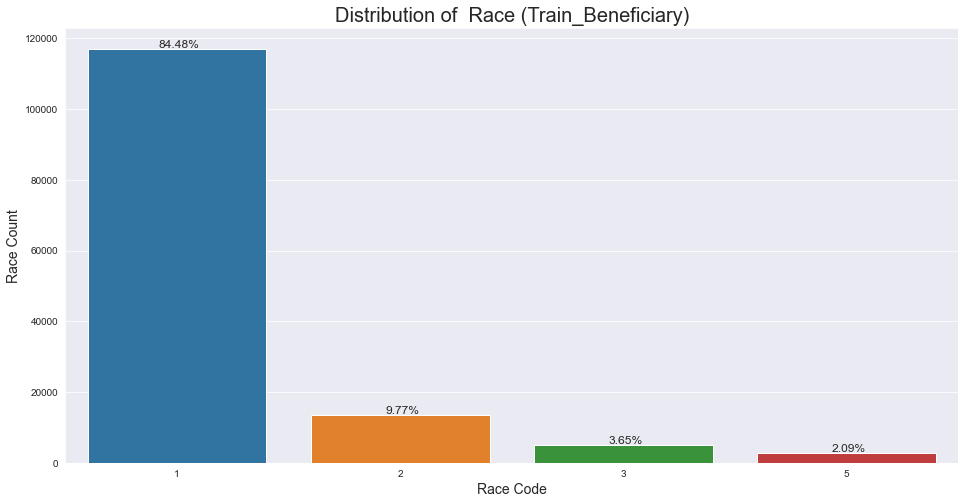

In [17]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Race',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Race'].value_counts().index)
plt.title('Distribution of  Race (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 14)
plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 200,12)

### Observation:
1. Race 1 is the most in terms of beneficiary count.
2. 85% beneficiaries belongs to race 1.
3. There is no race 4 in the dataset.

#### Plot the distribution of the Patient Risk Score in the beneficiary data to check overall health conditions of all the beneficiaries.

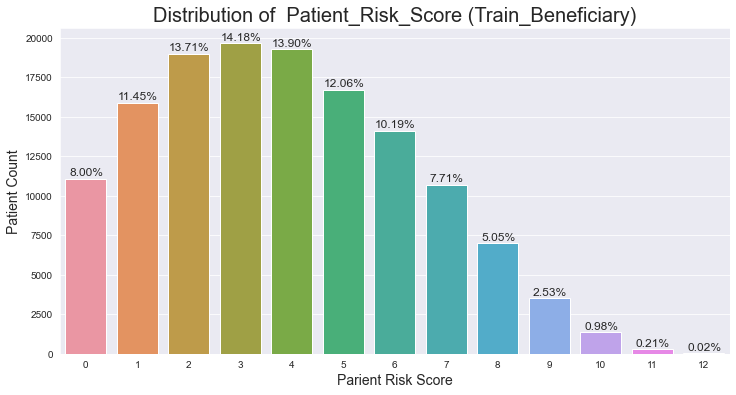

In [18]:
# Distribition of patient risk score
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=Train_Beneficiary, orient ="v")
plt.title('Distribution of  Patient_Risk_Score (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Parient Risk Score', size = 14)
plt.ylabel('Patient Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Patient_Risk_Score'], 0.01, 200,12)

### Observation:
1. The distribution of patient risk score is right tailed.
2. Most of the patients with risk score 2, 3, 4, 5.
3. Very few patients are there with risk score 9, 10, 11, 12

#### Plot the countplot of NoOfMonths_PartACov for all beneficiaries

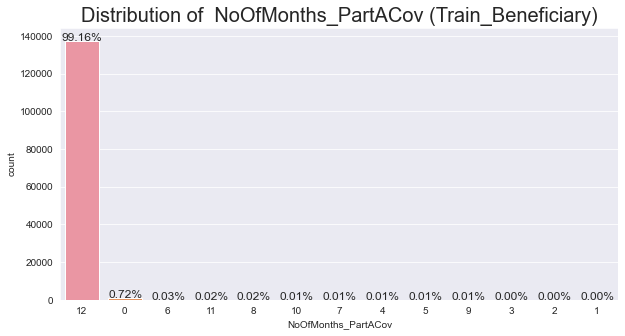

In [19]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartACov',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['NoOfMonths_PartACov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartACov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 200,12)

### Observation:
1. 99% patients covered Part A for 12 months.

#### Plot the countplot of NoOfMonths_PartBCov for all beneficiaries

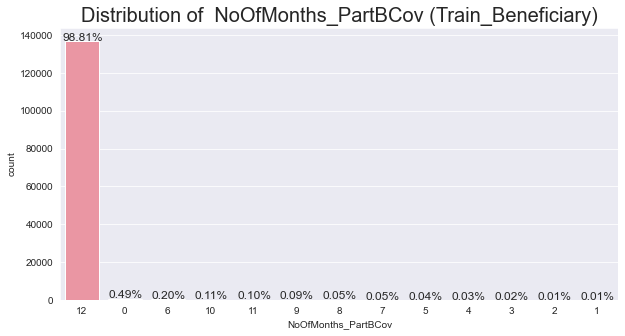

In [20]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartBCov',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['NoOfMonths_PartBCov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartBCov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 200,12)

### Observation:
1. 98% patients covered Part B for 12 months.

In [21]:
# Calculate total inpatient reimbursement amount for all the beneficiaries
Train_Beneficiary.IPAnnualReimbursementAmt.sum()

507162970

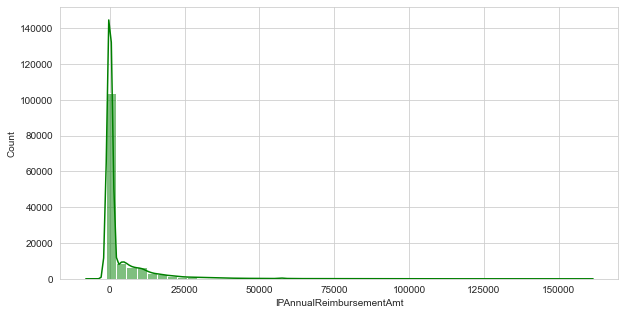

In [22]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['IPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [23]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")

25 , 0.0 || 50 , 0.0 || 75 , 2280.0 || 100 , 161470.0 || 

In [24]:
for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")

90 , 12000.0 || 91 , 13000.0 || 92 , 14400.0 || 93 , 16000.0 || 94 , 18000.0 || 95 , 20260.0 || 96 , 24000.0 || 97 , 28243.50000000006 || 98 , 35000.0 || 99 , 49000.0 || 

In [25]:
for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")

99.1 , 51110.0 || 99.2 , 54000.0 || 99.3 , 57000.0 || 99.4 , 57100.0 || 99.5 , 59210.0 || 99.6 , 63000.0 || 99.7 , 67333.39999999967 || 99.8 , 74000.0 || 99.9 , 87000.0 || 100 , 161470.0 || 

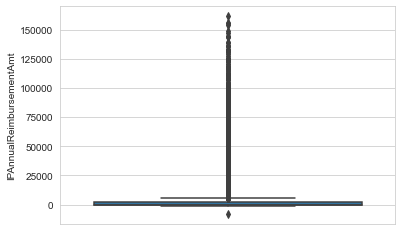

In [26]:
# Plot boxplot for IPAnnualReimbursementAmt
sns.boxplot(y='IPAnnualReimbursementAmt', data=Train_Beneficiary)
plt.show()

### Observation:

1. 25th and 50th percentile of annual reimbursement amount is zero.
2. 75th and 99th percentile of annual reimbursement amount are 2800 and 49000 respectively.
3. There may be some outliers as 100th percentile is 161410.
4. Total annual reimbursement amount is 507162970.

In [27]:
# Calculate total inpatient deductible amount for all the beneficiaries
Train_Beneficiary.IPAnnualDeductibleAmt.sum()

55401242

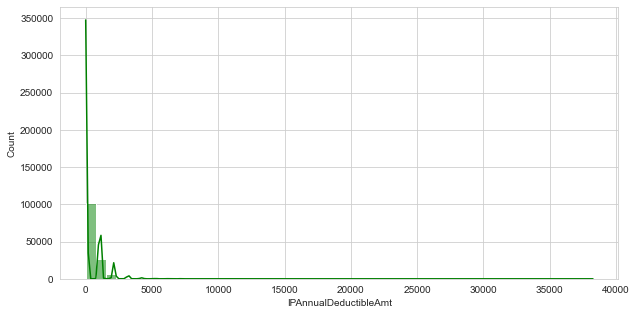

In [28]:
# Plot distribution of IPAnnualDeductibleAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['IPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [29]:
# check the percentiles
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualDeductibleAmt'], p), end=" || ")
    

print('\n'+'='*100)

for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualDeductibleAmt'], p), end=" || ")
    
print('\n'+'='*100)

for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualDeductibleAmt'], p), end=" || ")

25 , 0.0 || 50 , 0.0 || 75 , 1068.0 || 100 , 38272.0 || 
90 , 1068.0 || 91 , 1068.0 || 92 , 1068.0 || 93 , 1068.0 || 94 , 2136.0 || 95 , 2136.0 || 96 , 2136.0 || 97 , 2136.0 || 98 , 2136.0 || 99 , 3204.0 || 
99.1 , 3204.0 || 99.2 , 3204.0 || 99.3 , 4136.0 || 99.4 , 4272.0 || 99.5 , 4272.0 || 99.6 , 4272.0 || 99.7 , 5340.0 || 99.8 , 6272.0 || 99.9 , 9068.0 || 100 , 38272.0 || 

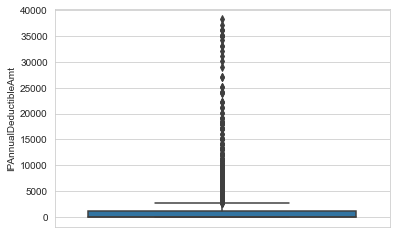

In [30]:
# Plot boxplot of IPAnnualDeductibleAmt
sns.boxplot(y='IPAnnualDeductibleAmt', data=Train_Beneficiary)
plt.show()

### Observation:

1. 25th and 50th percentile of annual deductible amount is zero.
2. 75th and 99th percentile of annual deductible amount are 1068 and 38272 respectively.
3. There may be some outliers as 100th percentile is 38272.
4. Total annual deductible amount is 55401242.

#### Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt

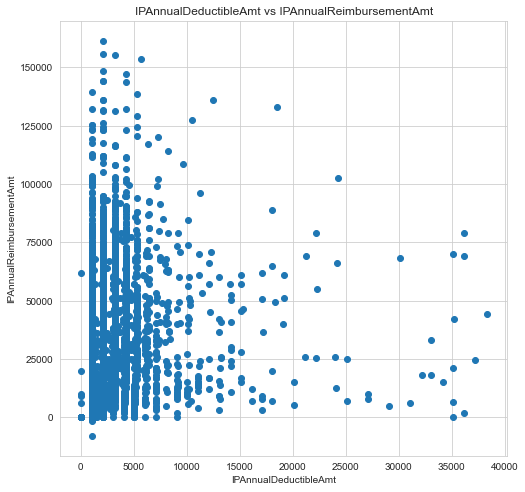

In [31]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(Train_Beneficiary.IPAnnualDeductibleAmt, Train_Beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('IPAnnualReimbursementAmt')
plt.title('IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt')
plt.show()

### Observation:

IPAnnualDeductibleAmt indicated the amount paid by the beneficiary anually for inpatient claim and IPAnnualReimbursementAmt indicates the reimbursement amount the beneficiary is eligible for per annum.
1. For some of the patients even though the deductible amount is zero, reimbursement is very high.
2. For some of the patients deductible amount is very high but reimbursement amount zero or very low. <br>

May be these data are wrong due to wrong entry.

In [32]:
# Calculate total outpatient reimbursement amount for all the beneficiaries
Train_Beneficiary.OPAnnualReimbursementAmt.sum()

179876080

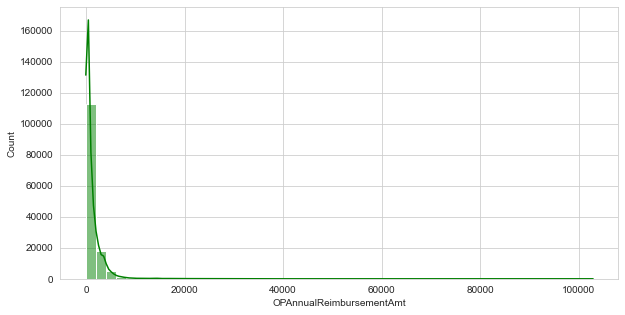

In [33]:
# Plot distribution of OPAnnualReimbursementAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['OPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [34]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")
    

print('\n'+'='*100)

for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")
    
print('\n'+'='*100)

for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")

25 , 170.0 || 50 , 570.0 || 75 , 1500.0 || 100 , 102960.0 || 
90 , 3230.0 || 91 , 3380.500000000029 || 92 , 3560.0 || 93 , 3780.0 || 94 , 4030.0 || 95 , 4370.0 || 96 , 4850.0 || 97 , 5540.0 || 98 , 6850.0 || 99 , 11514.500000000116 || 
99.1 , 12680.250000000233 || 99.2 , 13840.0 || 99.3 , 14741.149999999907 || 99.4 , 16173.400000000256 || 99.5 , 17666.750000000175 || 99.6 , 19197.79999999999 || 99.7 , 21406.699999999837 || 99.8 , 24230.0 || 99.9 , 28694.45000000007 || 100 , 102960.0 || 

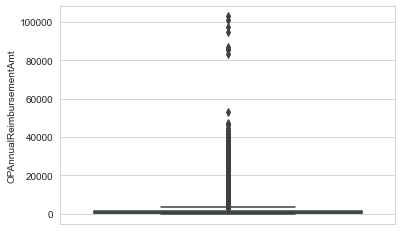

In [35]:
# plot boxplot for OPAnnualReimbursementAmt
sns.boxplot(y='OPAnnualReimbursementAmt', data=Train_Beneficiary)
plt.show()

### Observation:

1. 25th and 50th percentile of outpatient annual reimbursement amounts are 170 and 570 respectively.
2. 75th and 99th percentile of outpatient annual reimbursement amount are 1500 and 11514 respectively.
3. There may be some outliers as 100th percentile is 102960.
4. Total outpatient annual reimbursement amount is 179876080.

In [36]:
# Calculate total outpatient deductible amount for all the beneficiaries
Train_Beneficiary.OPAnnualDeductibleAmt.sum()

52335131

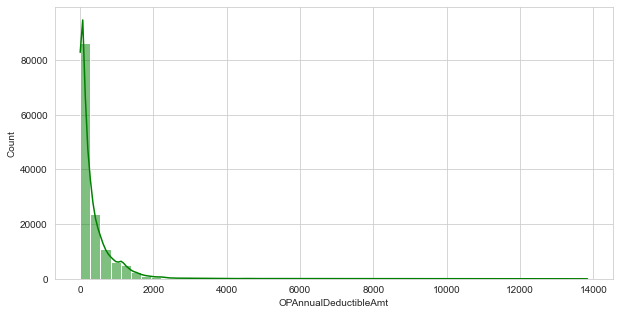

In [37]:
# Plot distribution of OPAnnualDeductibleAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['OPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [38]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualDeductibleAmt'], p), end=" || ")
    

print('\n'+'='*100)

for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualDeductibleAmt'], p), end=" || ")
    
print('\n'+'='*100)

for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualDeductibleAmt'], p), end=" || ")

25 , 40.0 || 50 , 170.0 || 75 , 460.0 || 100 , 13840.0 || 
90 , 1000.0 || 91 , 1060.0 || 92 , 1120.0 || 93 , 1180.0 || 94 , 1250.0 || 95 , 1340.0 || 96 , 1470.0 || 97 , 1650.0 || 98 , 1999.7999999999884 || 99 , 2960.0 || 
99.1 , 3180.0 || 99.2 , 3435.5999999999767 || 99.3 , 3720.0 || 99.4 , 4100.0 || 99.5 , 4502.250000000058 || 99.6 , 4970.0 || 99.7 , 5440.0 || 99.8 , 6070.0 || 99.9 , 7040.0 || 100 , 13840.0 || 

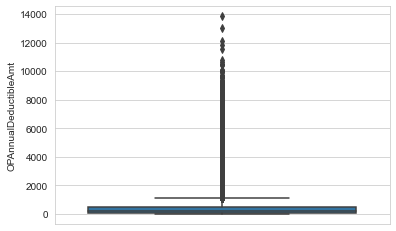

In [39]:
# Plot boxplot for OPAnnualDeductibleAmt
sns.boxplot(y='OPAnnualDeductibleAmt', data=Train_Beneficiary)
plt.show()

### Observation:

1. 25th and 50th percentile of annual reimbursement amounts are 40 and 170 respectively.
2. 75th and 99th percentile of annual reimbursement amount are 460 and 2960 respectively.
3. There may be some outliers as 100th percentile is 13840.
4. Total annual reimbursement amount is 52335131.

#### Plot Scatterplot OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt

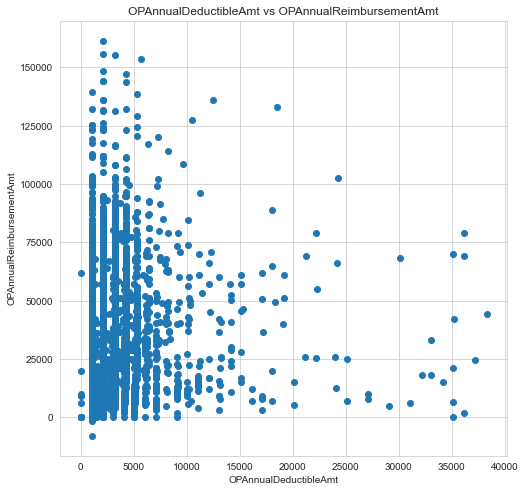

In [40]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(Train_Beneficiary.IPAnnualDeductibleAmt, Train_Beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('OPAnnualReimbursementAmt')
plt.title('OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt')
plt.show()

### Observation:

OPAnnualDeductibleAmt indicated the amount paid by the beneficiary anually for outpatient claim and OPAnnualReimbursementAmt indicates the reimbursement amount the beneficiary is eligible for per annum.
1. For some of the patients even though the deductible amount is zero, reimbursement is very high.
2. For some of the patients deductible amount is very high but reimbursement amount zero or very low. <br>

May be these data are wrong due to wrong entry.

In [41]:
Train_Beneficiary['DOB'][0]

'1/1/1943'

In [42]:
# Convert Date of Birth and Date of Death from String to Datetime format
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format = '%d/%m/%Y')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'],format ='%d/%m/%Y')

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format = '%d/%m/%Y')
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'],format ='%d/%m/%Y')

In [43]:
# Check last date DOD
Train_Beneficiary['DOD'].max()

Timestamp('2009-01-12 00:00:00')

In [44]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the birth month and Birth year for DOB and DOD
Train_Beneficiary['Birth_Year'] = Train_Beneficiary['DOB'].dt.year
Train_Beneficiary['Birth_Month'] = Train_Beneficiary['DOB'].dt.month

Test_Beneficiary['Birth_Year'] = Test_Beneficiary['DOB'].dt.year
Test_Beneficiary['Birth_Month'] = Test_Beneficiary['DOB'].dt.month

#### Calculate patient's age based on DOD, if DOD is not available calculate age based on the maximum date available in the data

In [45]:
# https://stackoverflow.com/questions/46508895/calculating-age-from-date-time-format-in-python-pandas?noredirect=1&lq=1
Train_Beneficiary['Patient_Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365)
Train_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Train_Beneficiary['DOB']).dt.days)/365),inplace=True)

Test_Beneficiary['Patient_Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB']).dt.days)/365)
Test_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Test_Beneficiary['DOB']).dt.days)/365),inplace=True)

#### Check the distribution of Age in Beneficiary Data

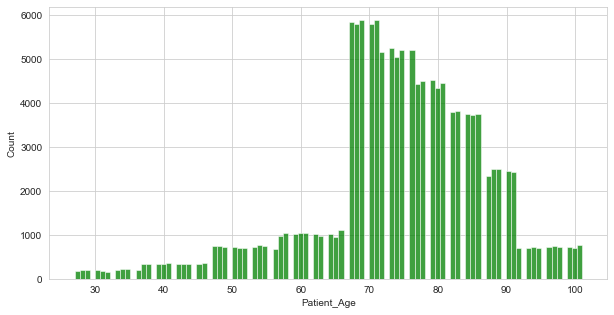

In [46]:
# Plot distribution of age
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['Patient_Age'], kde = False, color ='green', bins = 100)
plt.show()

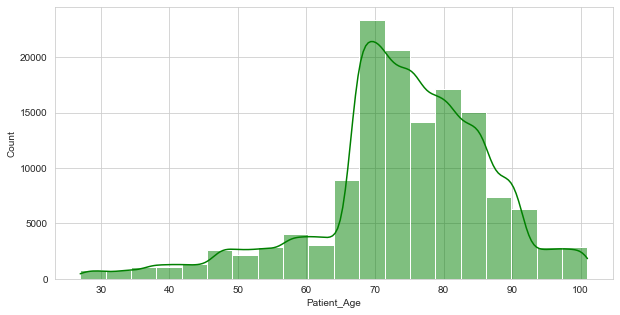

In [47]:
# Plot distribution of age
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['Patient_Age'], kde = True, color ='green', bins = 20)
plt.show()

### Observation:

1. There are very less number of patients in the age group 20-40
2. Most of the patients are with age group 60-90
3. Number of patients are less in the age group 90-100

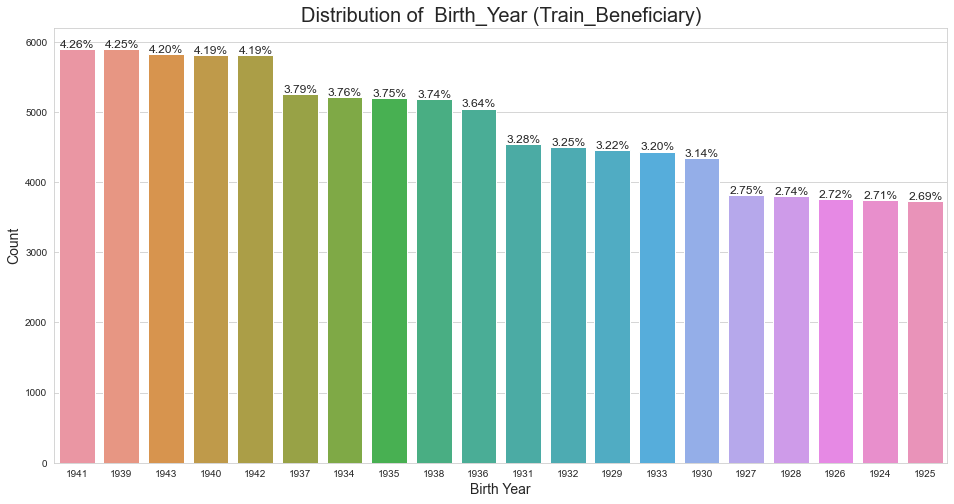

In [48]:
# Plot top 20 years in terms of patient's birth year count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Birth_Year',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Birth_Year'].value_counts().iloc[:20].index)
plt.title('Distribution of  Birth_Year (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Birth Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Birth_Year'], 0.01, 20,12)

### Observation:

1. 1941, 1939, 1943, 1940 and 1942 are the top years with patirnt's DOB count with 4% each of the total patients.

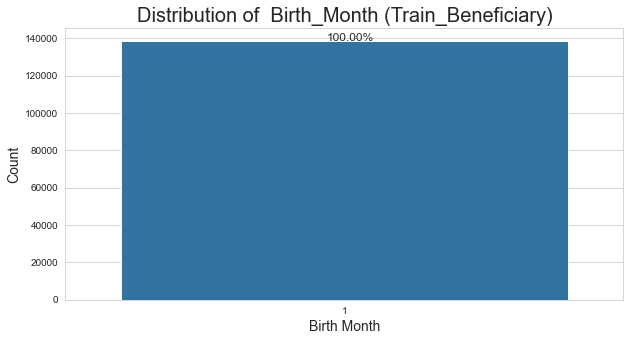

In [49]:
# Plot distribution of birth month of patients
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Birth_Month',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Birth_Month'].value_counts().index)
plt.title('Distribution of  Birth_Month (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Birth Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Birth_Month'], 0.01, 20,12)

### Observation:

1. Date of bitrh of all the patients are almost equally distributed accross all the months.

In [50]:
# Set value=1 if the patient is dead i.e DOD value is not null
Train_Beneficiary['isDead'] = 0
Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(), 'isDead'] = 1
Test_Beneficiary['isDead'] = 0
Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(), 'isDead'] = 1

## Analyze Train_Inpatient/Test_Inpatient Data

In [51]:
Train_Inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


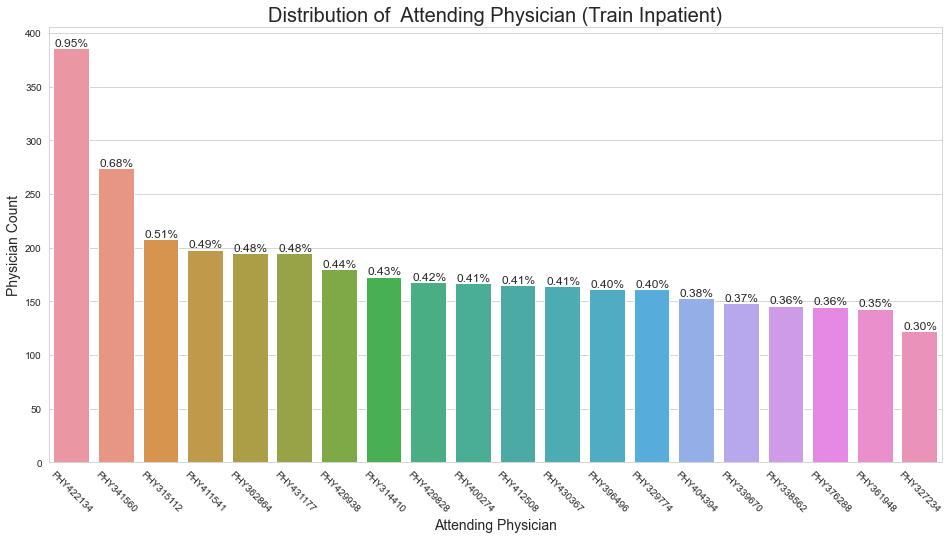

In [52]:
# Plot top 20 Attending Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Inpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['AttendingPhysician'], 0.02, 2, 12)

### Observation:

1. PHY422134, PHY341560, PHY315112, PHY411541, PHY431177 are the top 5 attending physicians in terms of number of patients visit.
2. PHY422134 treated 1% of the total patients.

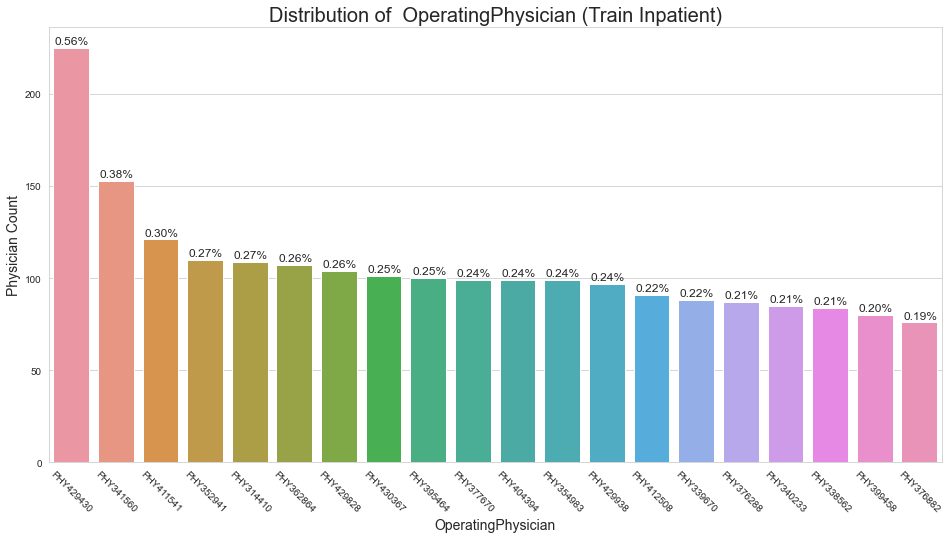

In [53]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Inpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['OperatingPhysician'], 0.02, 2, 12)

### Observation:

1. PHY429430, PHY341560, PHY411541, PHY352941, PHY314410 are the top 5 operating physicians in terms of number of patients operation.
2. PHY429430 operated 0.56% of the total patients.

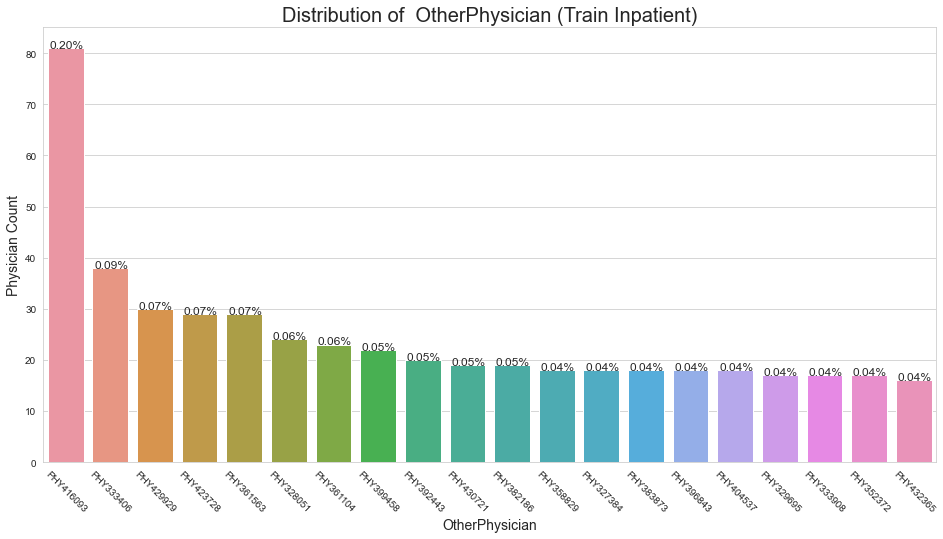

In [54]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OtherPhysician (Train Inpatient)', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['OtherPhysician'], 0.02, 0, 12)

### Observation:

1. PHY416093, PHY333406, PHY429929, PHY423728, PHY361563 are the top 5 other physicians in terms of number of patients visit.

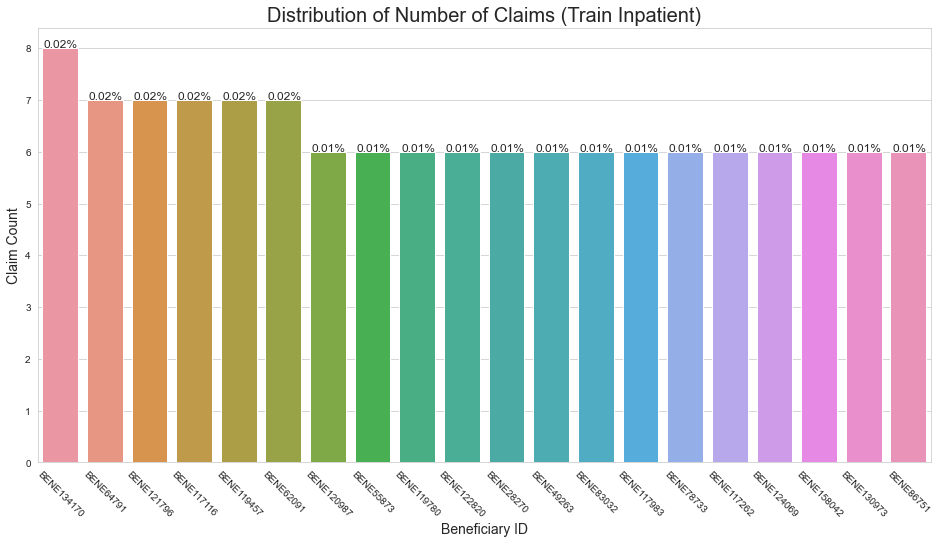

In [55]:
# Distribution of Number of Claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims (Train Inpatient)', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Inpatient['BeneID'], 0.02, 0.01, 12)

### Observation:

1. BENE134170 claimed maximum number of inpatient claims that is 8.
2. Another 5 beneficiaries claimed 7 claims, shown in the plot.

In [56]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Inpatient['ClaimStartDt'] = pd.to_datetime(Test_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Inpatient['ClaimEndDt'] = pd.to_datetime(Test_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format = '%Y-%m-%d')

Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format = '%Y-%m-%d')

In [57]:
# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
Train_Inpatient['Hospitalization_Duration'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Inpatient['Claim_Period'] = ((Train_Inpatient['ClaimEndDt'] - Train_Inpatient['ClaimStartDt']).dt.days)+1

Test_Inpatient['Hospitalization_Duration'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1
Test_Inpatient['Claim_Period'] = ((Test_Inpatient['ClaimEndDt'] - Test_Inpatient['ClaimStartDt']).dt.days)+1

#### If the number of days claimed for Inpatient treatment is more than no of days hospitalized is suscicious. So, I am adding this feature column.

In [58]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
Train_Inpatient['ExtraClaimDays'] = np.where(Train_Inpatient['Claim_Period']>Train_Inpatient['Hospitalization_Duration'], Train_Inpatient['Claim_Period'] - Train_Inpatient['Hospitalization_Duration'], 0)
Test_Inpatient['ExtraClaimDays'] = np.where(Test_Inpatient['Claim_Period']>Test_Inpatient['Hospitalization_Duration'], Test_Inpatient['Claim_Period'] - Test_Inpatient['Hospitalization_Duration'], 0)

In [59]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
Train_Inpatient['ClaimStart_Year'] = Train_Inpatient['ClaimStartDt'].dt.year
Train_Inpatient['ClaimStart_Month'] = Train_Inpatient['ClaimStartDt'].dt.month
Test_Inpatient['ClaimStart_Year'] = Test_Inpatient['ClaimStartDt'].dt.year
Test_Inpatient['ClaimStart_Month'] = Test_Inpatient['ClaimStartDt'].dt.month

Train_Inpatient['ClaimEnd_Year'] = Train_Inpatient['ClaimEndDt'].dt.year
Train_Inpatient['ClaimEnd_Month'] = Train_Inpatient['ClaimEndDt'].dt.month
Test_Inpatient['ClaimEnd_Year'] = Test_Inpatient['ClaimEndDt'].dt.year
Test_Inpatient['ClaimEnd_Month'] = Test_Inpatient['ClaimEndDt'].dt.month

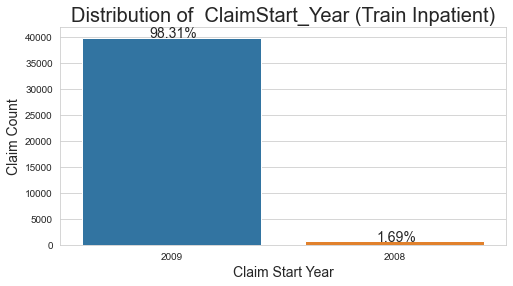

In [60]:
# Plot distribution of claim start year in Train Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, Train_Inpatient['ClaimStart_Year'], 0.01, 20,14)

### Observation:

1. For 98.3% of the patients claim started in 2009.
2. Only 1.7 % claim started in 2008

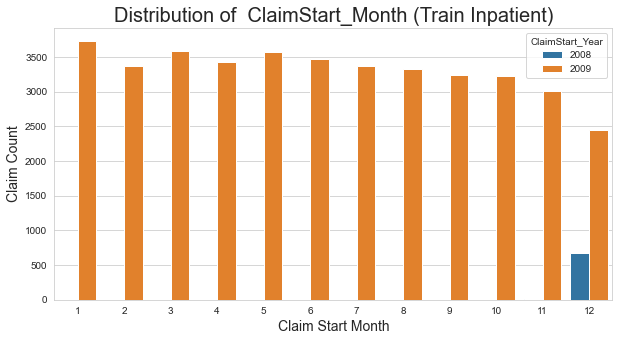

In [61]:
# Plot distribution of ClaimStart_Month in Train Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=Train_Inpatient, orient ="v", hue= 'ClaimStart_Year') #, order = Train_Inpatient['ClaimStart_Month'].value_counts().index
plt.title('Distribution of  ClaimStart_Month (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.show()

### Observation:

1. Claims are almost equally distributed accross all the months for the year 2009.
2. Claims are observed only in December for the year 2008. That means the data collected from Dec2008 to Dec2009.

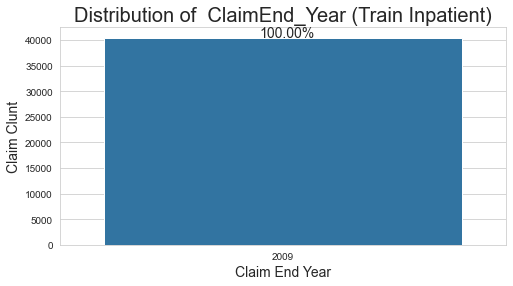

In [62]:
# Plot distribution of ClaimEnd_Year in Train_Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimEnd_Year',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['ClaimEnd_Year'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Year', size = 14)
plt.ylabel('Claim Clunt', size = 14)
percentage_without_hue(ax, Train_Inpatient['ClaimEnd_Year'], 0.01, 20,14)

### Observation:

1. All the claims ended in 2009.

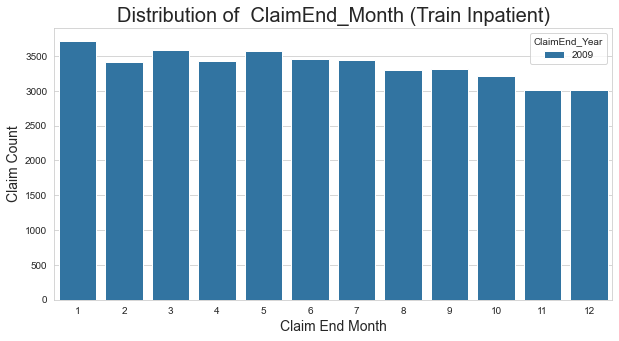

In [63]:
# Plot distribution of ClaimEnd_Month in Train_Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=Train_Inpatient, orient ="v", hue= 'ClaimEnd_Year') #, order = Train_Inpatient['ClaimEnd_Month'].value_counts().index
plt.title('Distribution of  ClaimEnd_Month (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.show()

### Observation:

1. All the claims ended in 2009, distributed accross all the months.

In [64]:
# Get the month and year of Admission_Year and Admission_Month
Train_Inpatient['Admission_Year'] = Train_Inpatient['AdmissionDt'].dt.year
Train_Inpatient['Admission_Month'] = Train_Inpatient['AdmissionDt'].dt.month
Test_Inpatient['Admission_Year'] = Test_Inpatient['AdmissionDt'].dt.year
Test_Inpatient['Admission_Month'] = Test_Inpatient['AdmissionDt'].dt.month

Train_Inpatient['Discharge_Year'] = Train_Inpatient['DischargeDt'].dt.year
Train_Inpatient['Discharge_Month'] = Train_Inpatient['DischargeDt'].dt.month
Test_Inpatient['Discharge_Year'] = Test_Inpatient['DischargeDt'].dt.year
Test_Inpatient['Discharge_Month'] = Test_Inpatient['DischargeDt'].dt.month

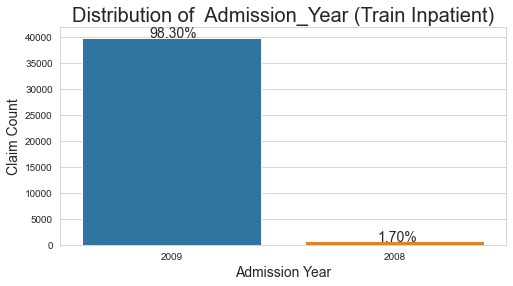

In [65]:
# Plot distribution of Admission_Year in Train_Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Admission_Year',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['Admission_Year'].value_counts().index)
plt.title('Distribution of  Admission_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Admission Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, Train_Inpatient['Admission_Year'], 0.01, 20,14)

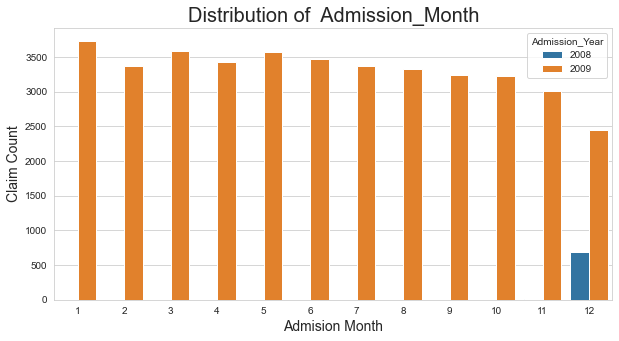

In [66]:
# Plot distribution of Admission_Month in Train_Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Admission_Month',y=None, data=Train_Inpatient, orient ="v", hue='Admission_Year') #, order = Train_Inpatient['Admission_Month'].value_counts().index
plt.title('Distribution of  Admission_Month', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Admision Month', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.show()

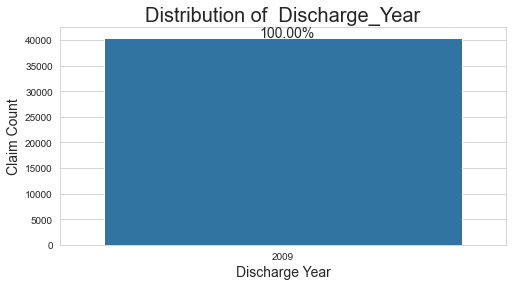

In [67]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Discharge_Year',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['Discharge_Year'].value_counts().index)
plt.title('Distribution of  Discharge_Year', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Discharge Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, Train_Inpatient['Discharge_Year'], 0.01, 20,14)

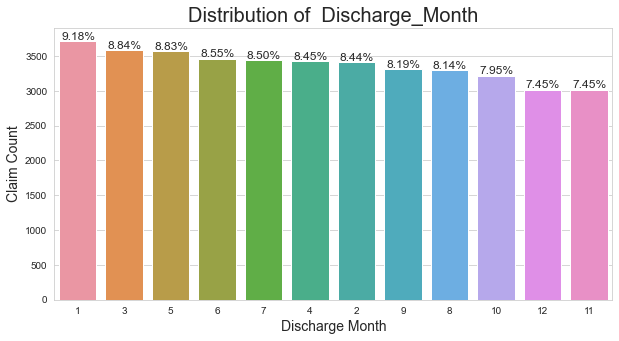

In [68]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Discharge_Month',y=None, data=Train_Inpatient, orient ="v", order = Train_Inpatient['Discharge_Month'].value_counts().index)
plt.title('Distribution of  Discharge_Month', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Discharge Month', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, Train_Inpatient['Discharge_Month'], 0.01, 20,12)

### Observation:

1. 98.3% patients got admitted in the year 2009 and only 1.7% in 2008
2. In 2008 patients were admitted only in December in the dataset.
3. All the patients were discharged in 2009 accross all the months.

In [69]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([Train_Inpatient["ClmProcedureCode_1"], 
                                   Train_Inpatient["ClmProcedureCode_2"],
                                   Train_Inpatient["ClmProcedureCode_3"],
                                   Train_Inpatient["ClmProcedureCode_4"], 
                                   Train_Inpatient["ClmProcedureCode_5"], 
                                   Train_Inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

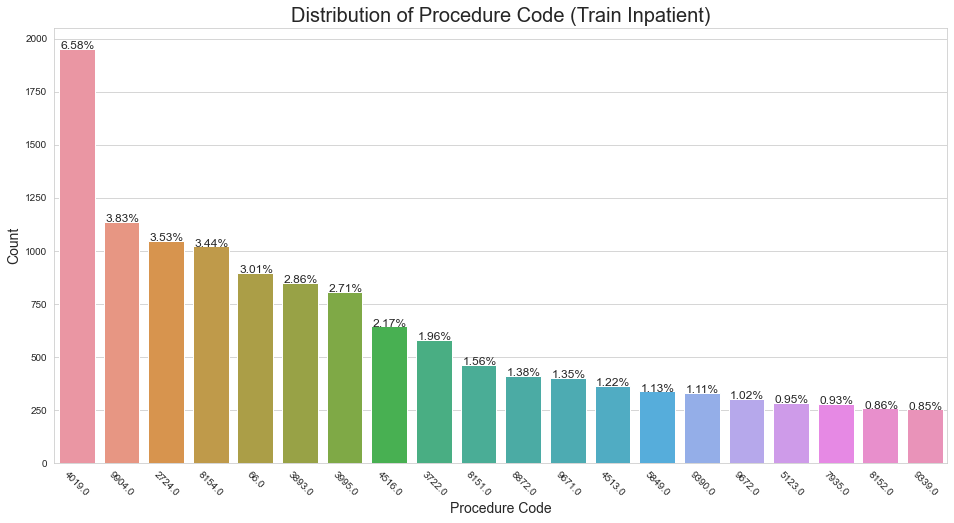

In [70]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP_df, orient ="v", order = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Inpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_IP_df['ProcedureCode'], 0.02, 0.01, 12)

### Observation:

1. 4019, 9904, 2714, 8154, 66 are the top 5 procedures in terms of number of procedures.
2. 4019 test is done 6.5% of the total procedures.

In [71]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Train_Inpatient["ClmDiagnosisCode_1"], 
                                           Train_Inpatient["ClmDiagnosisCode_2"], 
                                           Train_Inpatient["ClmDiagnosisCode_3"], 
                                           Train_Inpatient["ClmDiagnosisCode_4"],
                                           Train_Inpatient["ClmDiagnosisCode_5"], 
                                           Train_Inpatient["ClmDiagnosisCode_6"],
                                           Train_Inpatient["ClmDiagnosisCode_7"],
                                           Train_Inpatient["ClmDiagnosisCode_8"],
                                           Train_Inpatient["ClmDiagnosisCode_9"],
                                           Train_Inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

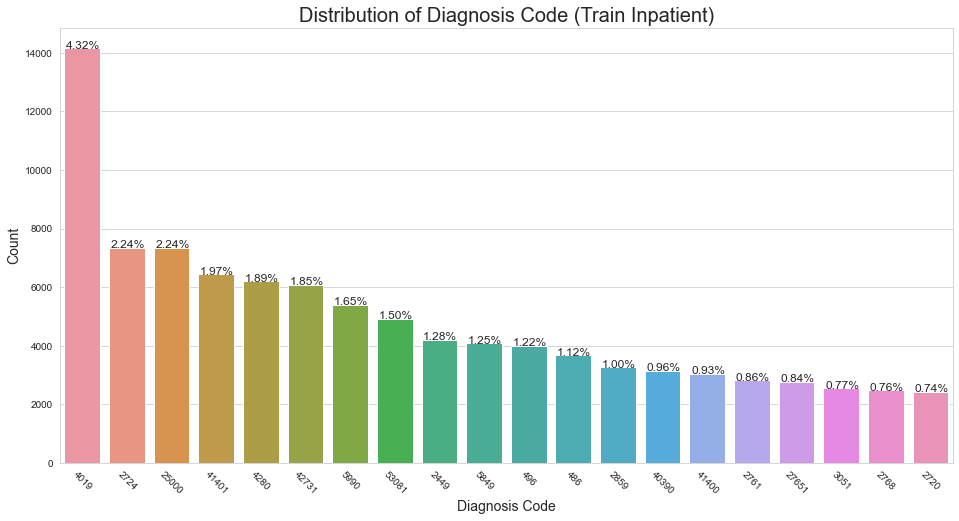

In [72]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_IP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Inpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_IP_df['DiagnosisCode'], 0.02, 0.01, 12)

### Observation:

1. 4019, 2724, 25000, 41401, 4280 are the top 5 diagnosis in terms of number of diagnosos done.
2. 4019 test is done 4.3% of the total diagnosis.

In [73]:
# Calculate total InscClaimAmtReimbursed for inpatient
Train_Inpatient['InscClaimAmtReimbursed'].notna().sum()

40474

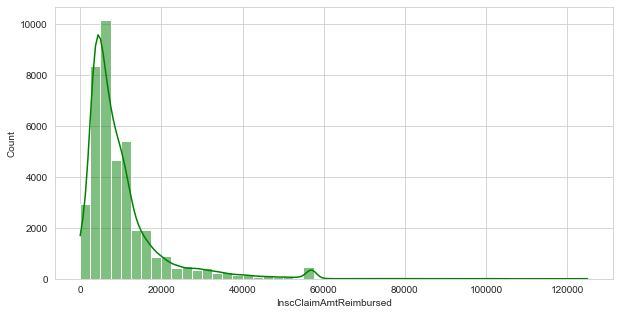

In [74]:
# Plot the distribution for InscClaimAmtReimbursed
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.histplot(Train_Inpatient['InscClaimAmtReimbursed'], kde = True, color ='green', bins = 50)
plt.show()

In [75]:
# Calculate total InscClaimAmtReimbursed for inpatient
Train_Inpatient['DeductibleAmtPaid'].notna().sum()

39575

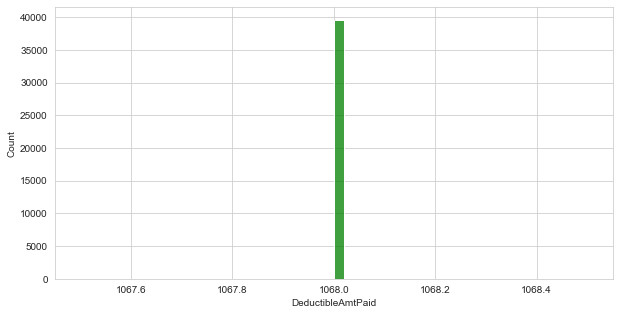

In [76]:
# Plot the distribution for DeductibleAmtPaid
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.histplot(Train_Inpatient['DeductibleAmtPaid'].dropna(), kde = False, color ='green', bins = 50)
plt.show()

### Observation:

1. Total InscClaimAmtReimbursed for inpatient is 40474
2. For very few claims InscClaimAmtReimbursed are very high.
3. DeductibleAmtPaid value is either 0 or 1068

In [77]:
Train_Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month'],
      dtype='object')

## Analyze Train_Outpatient/Test_Outpatient

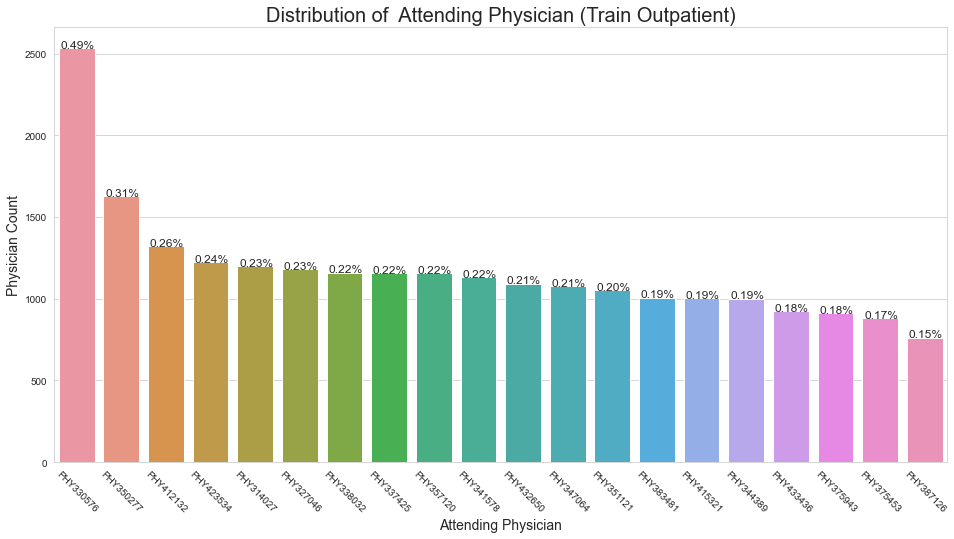

In [78]:
# Top 20 attending physician in terms of patient count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Outpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['AttendingPhysician'], 0.02, 2, 12)

### Observation:

1. PHY330576, PHY350277, PHY412132, PHY423534, PHY314027 are the top 5 attending physicians in terms of number of patients visit.
2. PHY330576 treated 0.5% of the total patients.

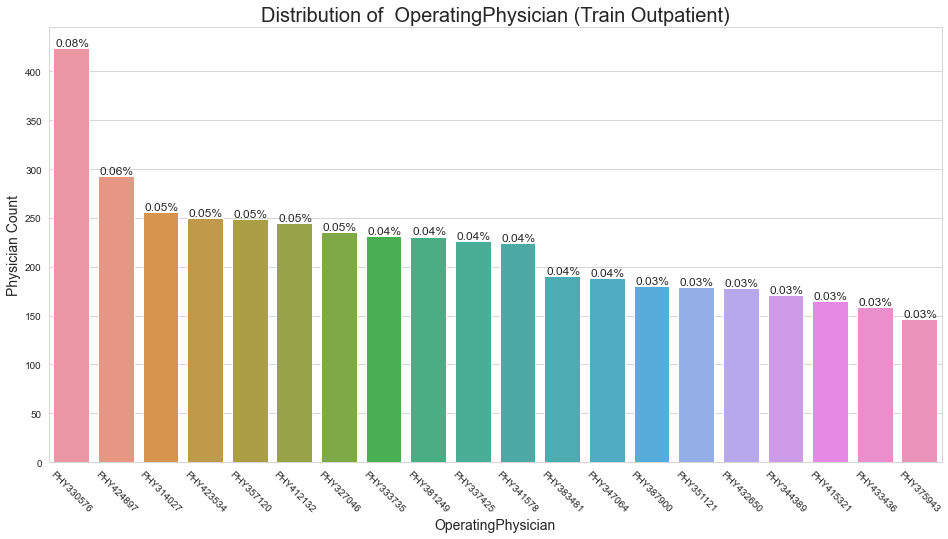

In [79]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['OperatingPhysician'], 0.02, 2, 12)

### Observation:

1. PHY330576, PHY424897, PHY314027, PHY423534, PHY357120 are the top 5 operating physicians in terms of number of patients operation.
2. PHY330576 operated 0.08% of the total patients.

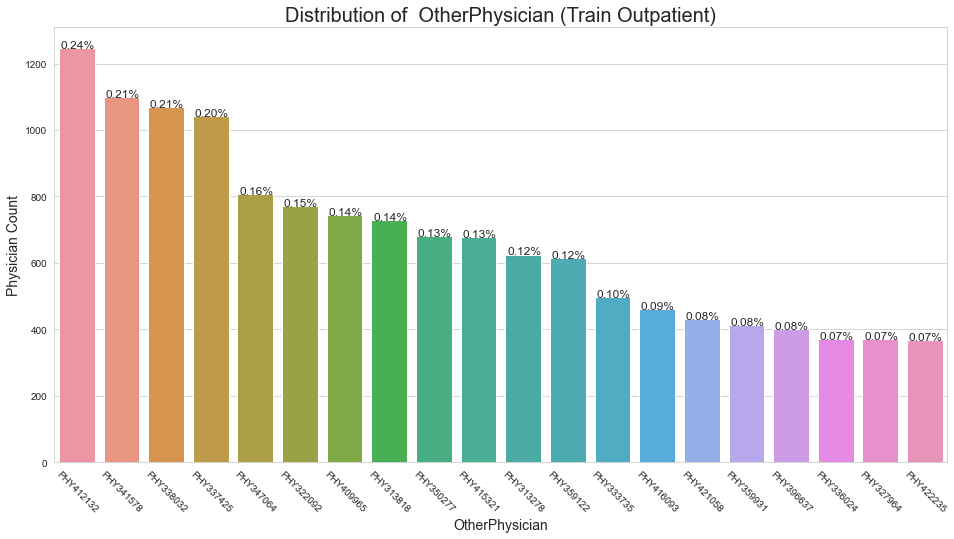

In [80]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OtherPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['OtherPhysician'], 0.02, 0, 12)

### Observation:

1. PHY412132, PHY341578, PHY338032, PHY337425, PHY347064 are the top 5 other physicians in terms of number of patients visit.

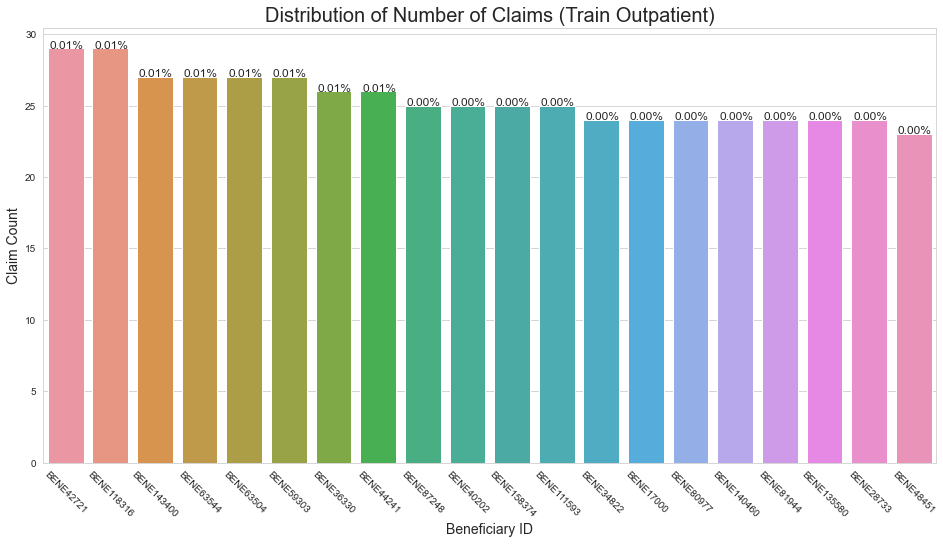

In [81]:
# Distribution of Number of Claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims (Train Outpatient)', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, Train_Outpatient['BeneID'], 0.02, 0.01, 12)

### Observation:

1. BENE118316 and BENE42721 claimed maximum number of inpatient claims that is 29.
2. Another 4 beneficiaries claimed 26 claims, shown in the plot.

In [82]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Outpatient['ClaimStartDt'] = pd.to_datetime(Test_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Outpatient['ClaimEndDt'] = pd.to_datetime(Test_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

In [83]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
Train_Outpatient['ClaimStart_Year'] = Train_Outpatient['ClaimStartDt'].dt.year
Train_Outpatient['ClaimStart_Month'] = Train_Outpatient['ClaimStartDt'].dt.month
Test_Outpatient['ClaimStart_Year'] = Test_Outpatient['ClaimStartDt'].dt.year
Test_Outpatient['ClaimStart_Month'] = Test_Outpatient['ClaimStartDt'].dt.month

Train_Outpatient['ClaimEnd_Year'] = Train_Outpatient['ClaimEndDt'].dt.year
Train_Outpatient['ClaimEnd_Month'] = Train_Outpatient['ClaimEndDt'].dt.month
Test_Outpatient['ClaimEnd_Year'] = Test_Outpatient['ClaimEndDt'].dt.year
Test_Outpatient['ClaimEnd_Month'] = Test_Outpatient['ClaimEndDt'].dt.month

In [84]:
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Outpatient['Claim_Period'] = ((Train_Outpatient['ClaimEndDt'] - Train_Outpatient['ClaimStartDt']).dt.days)+1

Test_Outpatient['Claim_Period'] = ((Test_Outpatient['ClaimEndDt'] - Test_Outpatient['ClaimStartDt']).dt.days)+1

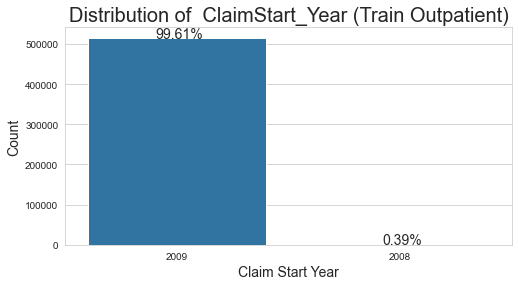

In [85]:
# Plot distribution of claim start year in Train Outpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimStart_Year'], 0.01, 20,14)

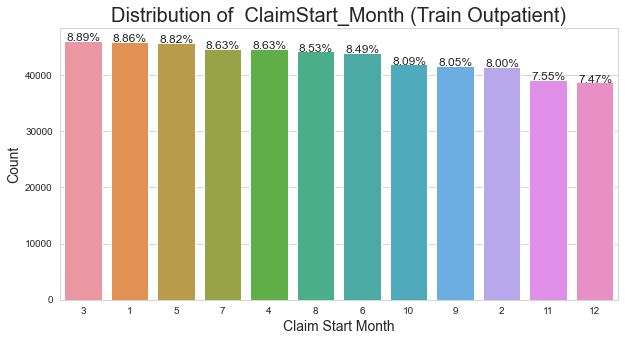

In [86]:
# Plot distribution of ClaimStart_Month in Train Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimStart_Month'].value_counts().index)
plt.title('Distribution of  ClaimStart_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimStart_Month'], 0.01, 20,12)

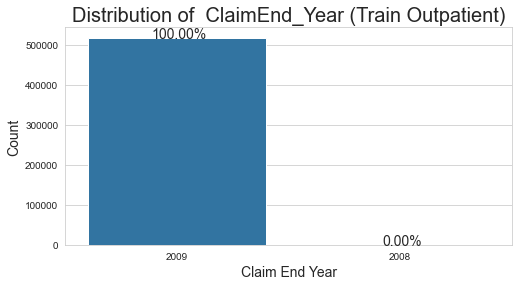

In [87]:
# Plot distribution of ClaimEnd_Year in Train_Outpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimEnd_Year',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimEnd_Year'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimEnd_Year'], 0.01, 20,14)

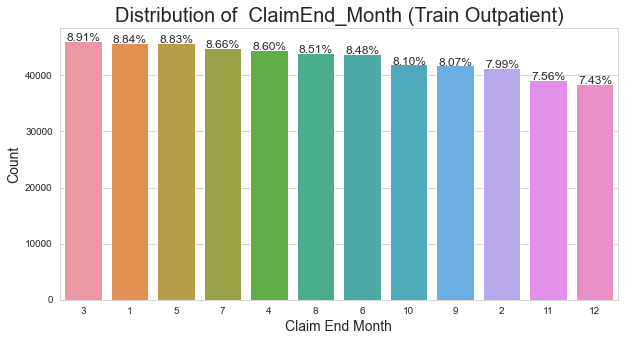

In [88]:
# Plot distribution of ClaimEnd_Month in Train_Outpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=Train_Outpatient, orient ="v", order = Train_Outpatient['ClaimEnd_Month'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Outpatient['ClaimEnd_Month'], 0.01, 20,12)

### Observation:

1. 99.6% claims started in 2009 only 0.4% claim started in 2008
2. Distribution of claim start year is uniform.
3. All the claims ended in 2009, distributed accross all the months.

In [89]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([Train_Outpatient["ClmProcedureCode_1"], 
                                   Train_Outpatient["ClmProcedureCode_2"],
                                   Train_Outpatient["ClmProcedureCode_3"],
                                   Train_Outpatient["ClmProcedureCode_4"], 
                                   Train_Outpatient["ClmProcedureCode_5"], 
                                   Train_Outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

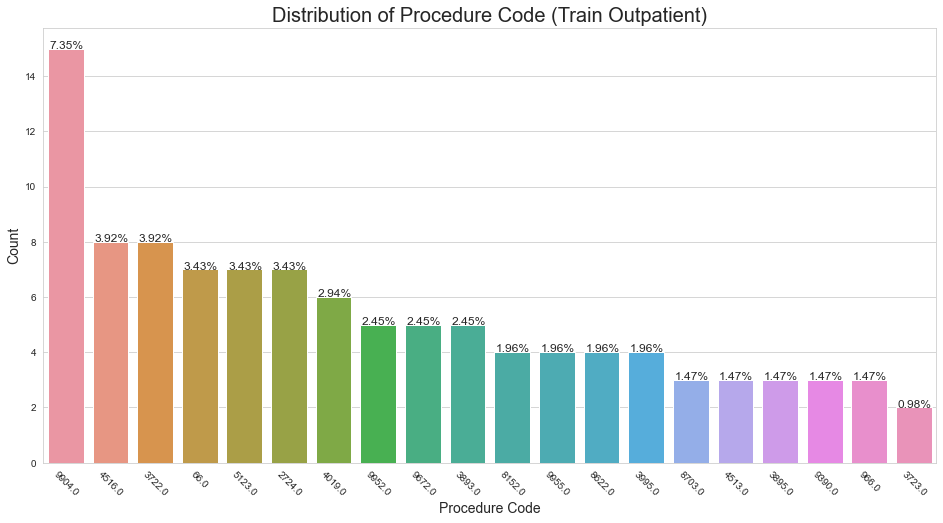

In [90]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP_df, orient ="v", order = ClmProcedureCode_OP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Outpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_OP_df['ProcedureCode'], 0.02, 0.01, 12)

### Observation:
1. Top 20 ProcedureCodes are shown in the plot.
2. Procedure 9904 was done 7.35%  of total procedures done.

In [91]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([Train_Outpatient["ClmDiagnosisCode_1"], 
                                           Train_Outpatient["ClmDiagnosisCode_2"], 
                                           Train_Outpatient["ClmDiagnosisCode_3"], 
                                           Train_Outpatient["ClmDiagnosisCode_4"],
                                           Train_Outpatient["ClmDiagnosisCode_5"], 
                                           Train_Outpatient["ClmDiagnosisCode_6"],
                                           Train_Outpatient["ClmDiagnosisCode_7"],
                                           Train_Outpatient["ClmDiagnosisCode_8"],
                                           Train_Outpatient["ClmDiagnosisCode_9"],
                                           Train_Outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

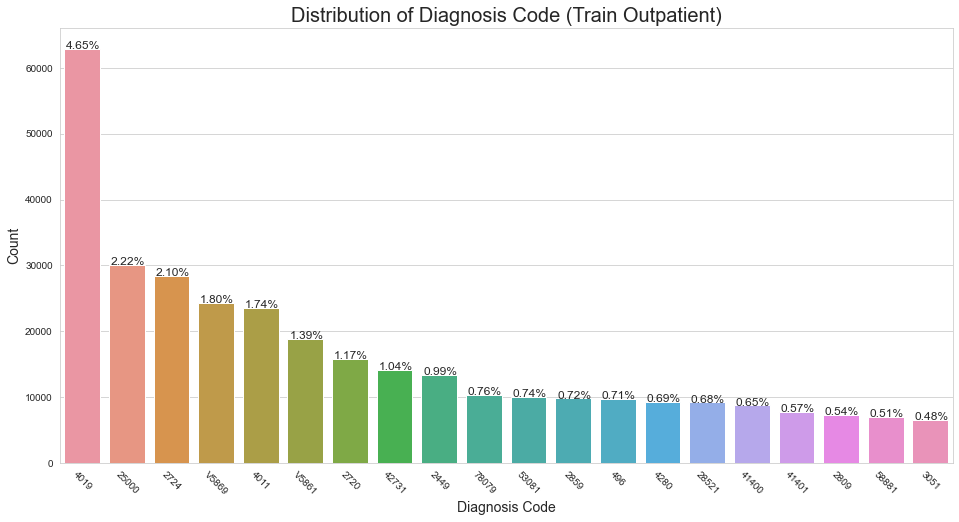

In [92]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_OP_df, orient ="v", order = ClmDiagnosisCode_OP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Outpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_OP_df['DiagnosisCode'], 0.02, 0.01, 12)

### Observation:
1. Top 20 DiagnosisCodes are shown in the plot.
2. Procedure 4019 was done 4.65%  of total procedures done.

In [93]:
Train_Outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period'],
      dtype='object')

In [94]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
Train_Inpatient['Inpatient_or_Outpatient'] = 1
Train_Outpatient['Inpatient_or_Outpatient'] = 0
Test_Inpatient['Inpatient_or_Outpatient'] = 1
Test_Outpatient['Inpatient_or_Outpatient'] = 0

## Merge Inpatient and Outpatient Data

In [95]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in Train_Outpatient.columns if idx in Train_Inpatient.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(Train_Inpatient, Train_Outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period', 'Inpatient_or_Outpatient']


In [96]:
# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, Train_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge provider details
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, Train , how = 'inner', on = 'Provider' )

In [97]:
# Merge inpatient and outpatient dataframes based on common columns

common_columns_test = [ idx for idx in Test_Outpatient.columns if idx in Test_Inpatient.columns]
Inpatient_Outpatient_Merge_Te = pd.merge(Test_Inpatient, Test_Outpatient, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, Test_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, Test , how = 'inner', on = 'Provider' )

In [98]:
Final_Dataset_Train.shape

(558211, 72)

In [99]:
Final_Dataset_Train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month,Inpatient_or_Outpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Birth_Year,Birth_Month,Patient_Age,isDead,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7,0.0,2009,4,2009,4,2009.0,4.0,2009.0,4.0,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7,1943,1,67.0,0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2009,9,2009,9,NaN,NaN,NaN,NaN,0,1932-01-05,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,4,1932,1,78.0,0,Yes


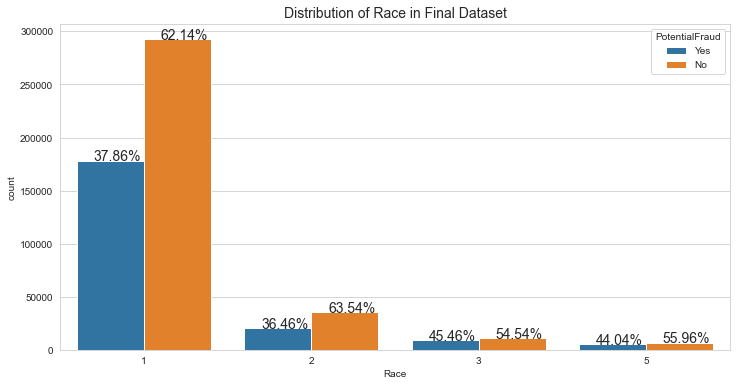

In [100]:
# Distribution of race in Overall data
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Race',y=None, data=Final_Dataset_Train, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = Final_Dataset_Train['Race'].value_counts().index)
plt.title('Distribution of Race in Final Dataset', size = 14)
percentage_with_hue(ax, Final_Dataset_Train.Race, 4,2,-0.1,200, 14)

### Observation:
1. Total number of transactions are more for Race 1, 37.8% are fraudulent out of them.
2. The ratio of fraudulent transaction is most for Race 3 (45.5%)
3. So, race is an important feature in fraud detection.

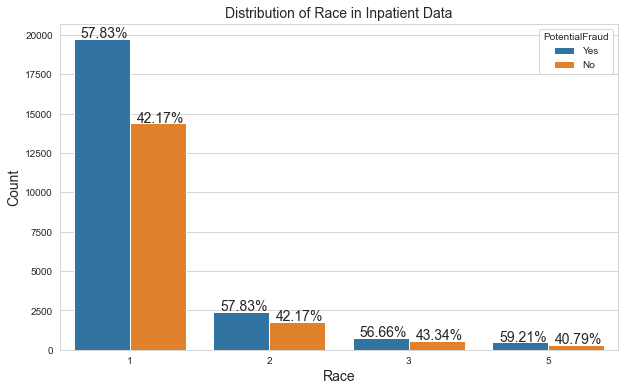

In [101]:
# Distribution of race in Inpatient Data
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 1]
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Inpatient Data', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race', size = 14)
plt.ylabel('Count', size = 14)
percentage_with_hue(ax, Data.Race, 4,2,-0.15,80, 14)

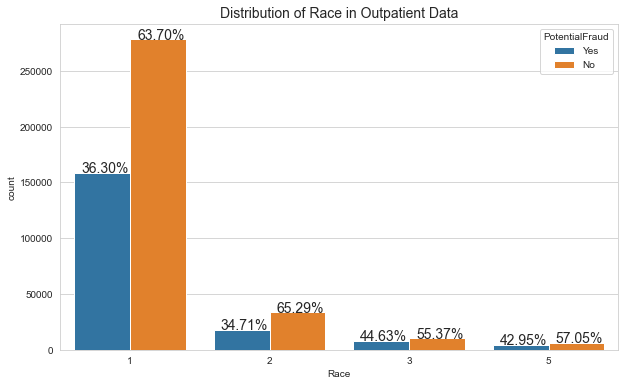

In [102]:
# Distribution of race in Inpatient Data
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 0]
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Outpatient Data', size = 14)
percentage_with_hue(ax, Data.Race, 4,2,-0.15,200, 14)

### Observation:
1. When inpatient and outpatient data is analyzed separetely it is observed that the percentage of fraudulent activity is more in Inpatient Data compared to Outpatient Data. This may be because of more money associated in inpatient claims.
2. In Inpatient data, Race 5 has highest percentage of fraudulent activity(59.21%)
3. In outpatient data Race 3 has highest percentage of fraudulent activity(44.63%)

In [103]:
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_number_of_inpatient_claims                                                                              

40474

In [104]:
#Calculatinng total and percentage money lost for Inpatient
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_Money_Fraud_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].sum()
print("Total_Money_Spent_Inpatient : ",Total_Money_Spent_Inpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Inpatient/Total_number_of_inpatient_claims))
print("Total_Money_Fraud_Inpatient : ",Total_Money_Fraud_Inpatient)
print("Percentage of money spent in fraud for Inpatient = {:.2f}%".format(Total_Money_Fraud_Inpatient/Total_Money_Spent_Inpatient *100))

Total_Money_Spent_Inpatient :  408297020
Average reimbursed amount per patient : 10088
Total_Money_Fraud_Inpatient :  241288510
Percentage of money spent in fraud for Inpatient = 59.10%


In [105]:
#Calculatinng total and percentage money lost for Outpatient
Total_number_of_Outpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].count()
Total_Money_Fraud_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].sum()
print("Total_Money_Spent_Outpatient : ",Total_Money_Spent_Outpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Outpatient/Total_number_of_Outpatient_claims))
print("Total_Money_Fraud_Outpatient : ",Total_Money_Fraud_Outpatient)
print("Percentage of money spent in fraud for Outpatient = {:.2f}%".format(Total_Money_Fraud_Outpatient/Total_Money_Spent_Outpatient *100))

Total_Money_Spent_Outpatient :  148246120
Average reimbursed amount per patient : 286
Total_Money_Fraud_Outpatient :  54392610
Percentage of money spent in fraud for Outpatient = 36.69%


In [106]:
#Calculatinng total and percentage money lost for overall data
Total_Money_Fraud = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent = Final_Dataset_Train.InscClaimAmtReimbursed.sum()
print("Total_Money_Spent : ",Total_Money_Spent)
print("Total_Money_Fraud : ",Total_Money_Fraud)
print("Percentage of money spent in fraud = {:.2f}%".format(Total_Money_Fraud/Total_Money_Spent *100))

Total_Money_Spent :  556543140
Total_Money_Fraud :  295681120
Percentage of money spent in fraud = 53.13%


### Observation:
1. Percentage of fraudulent activity is more in inpatient data this is because the average reimbursement amount for inpatient data(10088) is 35 times more than the average reimbursement amount(286) for outpatient.
2. Amount 295681120 is wasted for fraudulent transaction which is 53% of the total reimbursement amount(556543140)

In [107]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_df['ProcedureCode'] = pd.concat([Final_Dataset_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

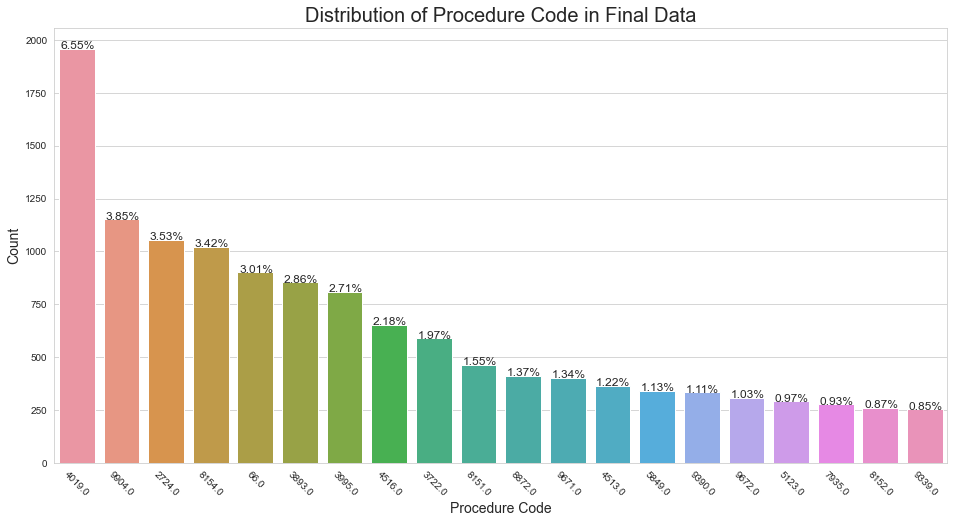

In [108]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_df, orient ="v", order = ClmProcedureCode_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code in Final Data', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_df['ProcedureCode'], 0.02, 0.01, 12)

### Observation:

1. Top 20 procedure codes are shown in the plot.
2. 4019 test is done 6.5% of the total procedures.

In [109]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df['DiagnosisCode'] = pd.concat([Final_Dataset_Train["ClmDiagnosisCode_1"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_2"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_3"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_4"],
                                           Final_Dataset_Train["ClmDiagnosisCode_5"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_6"],
                                           Final_Dataset_Train["ClmDiagnosisCode_7"],
                                           Final_Dataset_Train["ClmDiagnosisCode_8"],
                                           Final_Dataset_Train["ClmDiagnosisCode_9"],
                                           Final_Dataset_Train["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

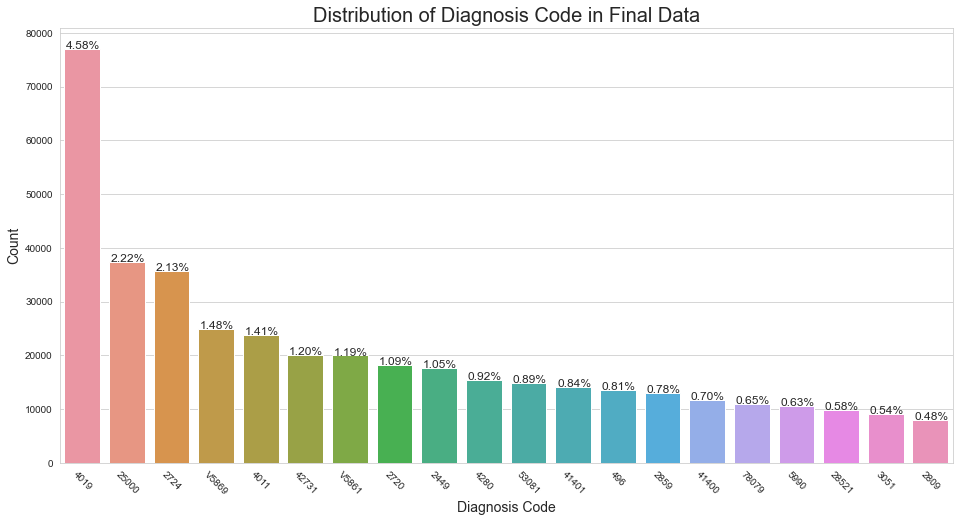

In [110]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_df, orient ="v", order = ClmDiagnosisCode_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code in Final Data', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_df['DiagnosisCode'], 0.02, 0.01, 12)

### Observation:

1. Top 20 diagnosis codes are shown in the plot.
2. 4019 diagnosis is done 4.5% of the total diagnosis.

In [111]:
# Separate dataframe with fraud only
Final_Dataset_Fraud_Train = Final_Dataset_Train[Final_Dataset_Train.PotentialFraud == 'Yes']
ClmProcedureCodeFraud_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCodeFraud_df['ProcedureCode'] = pd.concat([Final_Dataset_Fraud_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

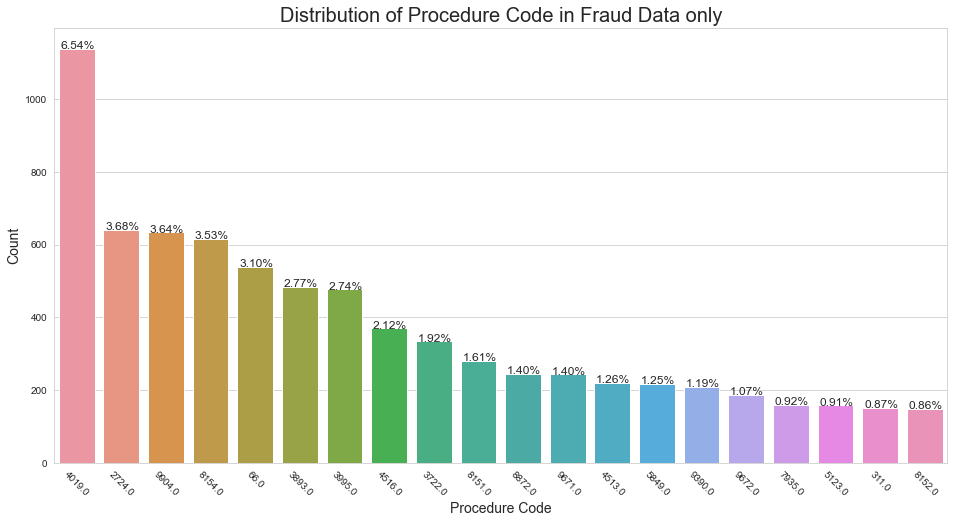

In [112]:
# Plot the countplot for claim diagnosis codes (Top 20) only for fraud data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCodeFraud_df, orient ="v", order = ClmProcedureCodeFraud_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code in Fraud Data only', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCodeFraud_df['ProcedureCode'], 0.02, 0.01, 12)

### Observation:

1. Top 20 diagnosis codes only for fraud data are shown in the plot.
2. 4019 diagnosis is done 6.5% of the total fraud diagnosis.

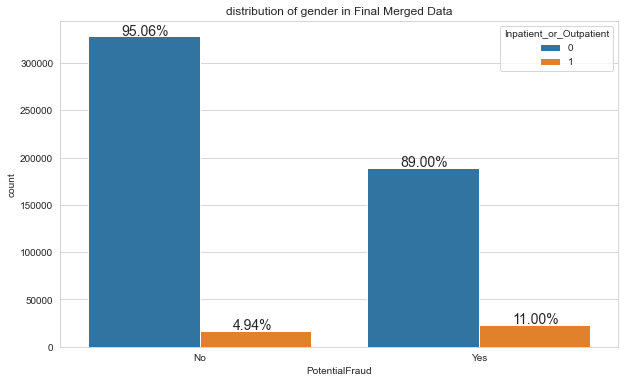

In [113]:
# Plot distribution of gender in Final Merged Data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='PotentialFraud',data=Final_Dataset_Train, hue = 'Inpatient_or_Outpatient', order = Final_Dataset_Train['PotentialFraud'].value_counts().index)
# plt.xticks(size = 10)
# plt.yticks(size = 10)
# plt.title('Distribution of  Gender', fontsize=20)
# plt.xlabel('Gender', size = 14)
# plt.ylabel('Count', size = 14)
plt.title('distribution of gender in Final Merged Data')
percentage_with_hue(ax, Final_Dataset_Train['PotentialFraud'], 2,2,-0.08,1000, 14)

### Observation:

1. Out of total fraudulent activities 89% comes from outpatient claim and 11% from inpatient claims in terms of claim count.

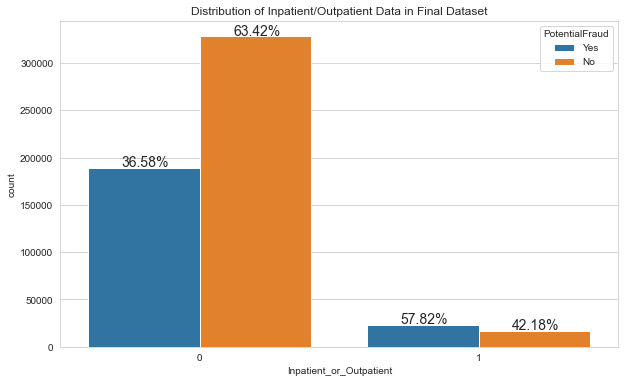

In [114]:
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Inpatient_or_Outpatient',data=Final_Dataset_Train, hue = 'PotentialFraud', order = Final_Dataset_Train['Inpatient_or_Outpatient'].value_counts().index)
# LABELS = ["Male", "Female"]
# plt.xticks(range(2), LABELS, size = 10)
# plt.xticks(size = 10)
# plt.yticks(size = 10)
# plt.title('Distribution of  Gender', fontsize=20)
# plt.xlabel('Gender', size = 14)
# plt.ylabel('Count', size = 14)
# percentage_without_hue(ax, Final_Dataset_Train['PotentialFraud'], 0,800,12)
plt.title('Distribution of Inpatient/Outpatient Data in Final Dataset')
percentage_with_hue(ax, Final_Dataset_Train['Inpatient_or_Outpatient'], 2,2,-0.08,1000, 14)

### Observation:
1. The number of claims are less for inpatient data compared to outpatient data.
2. Even though the claims are less in inpatient data, percentage of fraudulent activity is more in inpatient data(57.8%) whereas it is 36.5% in outpatient data. This is beacuse per claim reimbursement amount for inpatient is much higher(35 times calculated earlier) than the per claim reimbursement amount of outpatient.

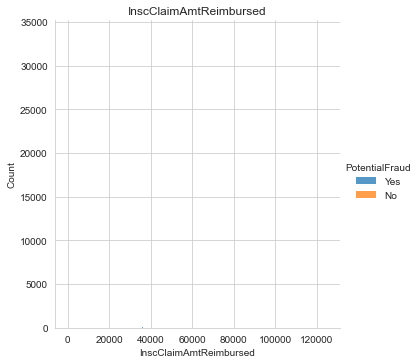

In [173]:
#Histogram of InscClaimAmtReimbursed
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", height=5) \
   .map(sns.histplot, "InscClaimAmtReimbursed") \
   .add_legend();
# plt.xlim(-1000,20000)
plt.title('InscClaimAmtReimbursed')
plt.show();

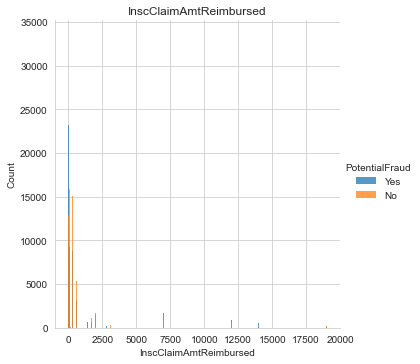

In [174]:
#Histogram of InscClaimAmtReimbursed
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", height=5) \
   .map(sns.histplot, "InscClaimAmtReimbursed") \
   .add_legend();
plt.xlim(-1000,20000)
plt.title('InscClaimAmtReimbursed')
plt.show();

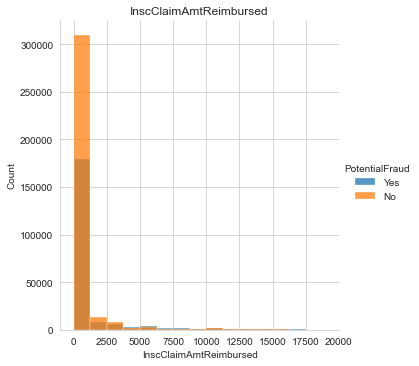

In [175]:
#Histogram of InscClaimAmtReimbursed
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", height=5) \
   .map(sns.histplot, "InscClaimAmtReimbursed", kde = False, bins = 100) \
   .add_legend();
plt.xlim(-1000,20000)
plt.title('InscClaimAmtReimbursed')
plt.show();

### Observation:
1. From the PDF and histogram of claim amount reimbursed we can observe that when the claim amount is less, the number of fraud claims are much higher compared to legitimate claims.
2. For higher amounts also fraudulent count is little higher.

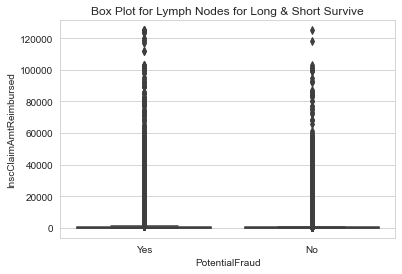

In [176]:
#Box Plot for InscClaimAmtReimbursed
sns.boxplot(x='PotentialFraud',y='InscClaimAmtReimbursed', data=Final_Dataset_Train)
# plt.ylim(0,1000)
plt.title('Box Plot for Lymph Nodes for Long & Short Survive')
plt.show()

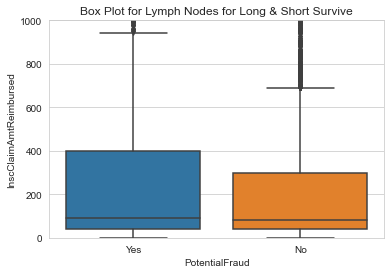

In [177]:
#Box Plot for InscClaimAmtReimbursed
sns.boxplot(x='PotentialFraud',y='InscClaimAmtReimbursed', data=Final_Dataset_Train)
plt.ylim(0,1000)
plt.title('Box Plot for Lymph Nodes for Long & Short Survive')
plt.show()

### Observation:
1. 25th, 50th percentiles are very less for claim amount reimbursed.
2. 75th percentile for fraudulent claims is higher than the legitimate claims.

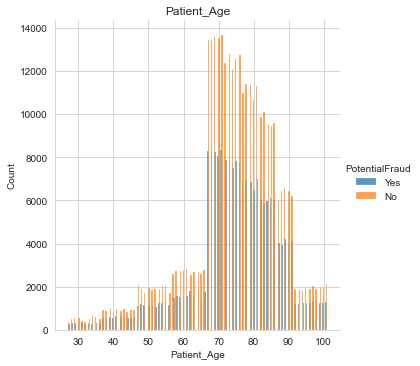

In [178]:
#Histogram of Patient Age
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", height=5) \
   .map(sns.histplot, "Patient_Age") \
   .add_legend();
# plt.xlim(-1000,20000)
plt.title('Patient_Age')
plt.show();

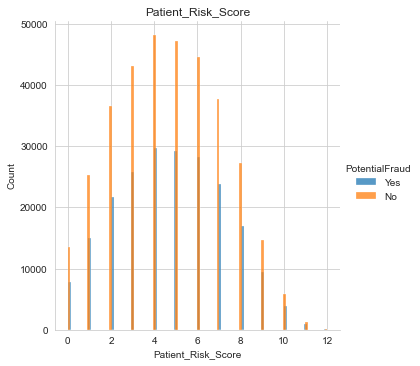

In [179]:
#Histogram of Patient Age
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", height=5) \
   .map(sns.histplot, "Patient_Risk_Score") \
   .add_legend();
# plt.xlim(-1000,20000)
plt.title('Patient_Risk_Score')
plt.show();

### Observation:
1. PDF of patient's age for fraudulent and non fraudulent activity overlaps each other.
2. PDF of patient's risk score for fraudulent and non fraudulent activity overlaps each other.

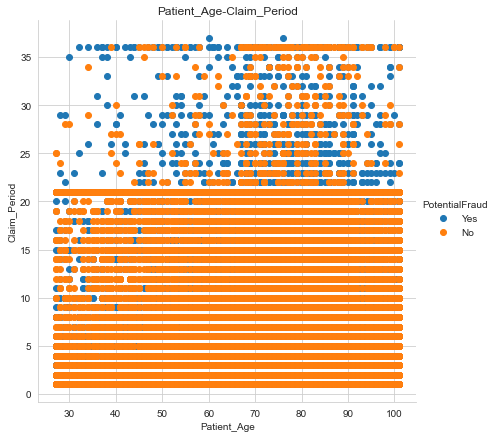

In [180]:
#Scatter Plot- Patient Age vs Claim_Period
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud', height=6)\
    .map(plt.scatter, "Patient_Age", "Claim_Period")\
    .add_legend();
plt.title('Patient_Age-Claim_Period')
plt.show();

### Observation:
1. From the scatter plot we can see that when patient's age <60 years and claim period more than 20 years, the probability of the transaction is fraudulent is high.

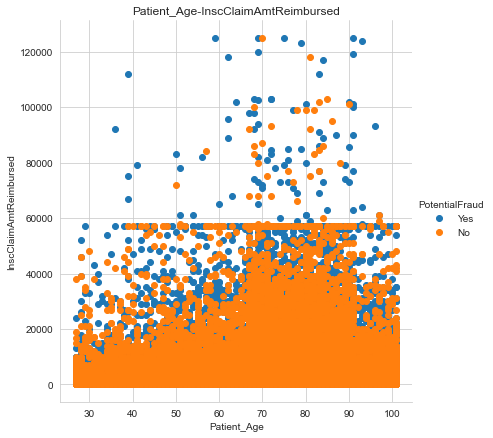

In [181]:
#Scatter Plot- Patient Age vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud', height=6)\
    .map(plt.scatter, "Patient_Age", "InscClaimAmtReimbursed")\
    .add_legend();
plt.title('Patient_Age-InscClaimAmtReimbursed')
plt.show();

### Observation:
1. From the Scatter Plot of Patient Age vs InscClaimAmtReimbursed I can observe that if patient's age<60 years and claim amount>60000 it tends to be a fraudulent transaction.
2. If the patient's age>88 yrs and claim amount>60000 the probability to be fraudulent is high.

In [182]:
# create new feature total reimbursement amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['OPAnnualDeductibleAmt']

Final_Dataset_Test['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['OPAnnualDeductibleAmt']

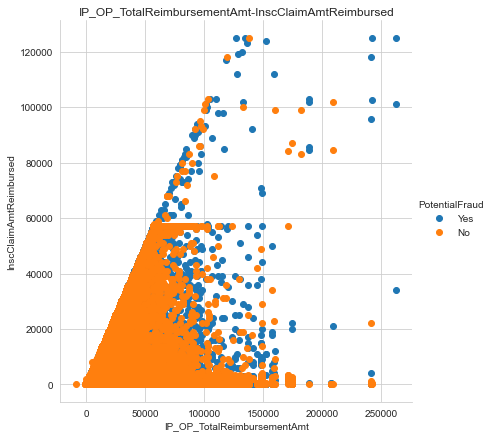

In [183]:
#Scatter Plot- IP_OP_TotalReimbursementAmt vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud', height=6)\
    .map(plt.scatter, "IP_OP_TotalReimbursementAmt", "InscClaimAmtReimbursed")\
    .add_legend();
plt.title('IP_OP_TotalReimbursementAmt-InscClaimAmtReimbursed')
plt.show();

### Observation:
1. If InscClaimAmtReimbursed>10000 and IP_OP_TotalReimbursementAmt>120000 then the chance to be a fraudulent transaction is high.

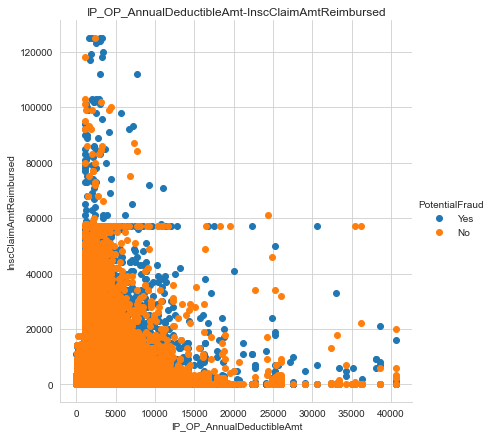

In [184]:
#Scatter Plot- IP_OP_AnnualDeductibleAmt vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud', height=6)\
    .map(plt.scatter, "IP_OP_AnnualDeductibleAmt", "InscClaimAmtReimbursed")\
    .add_legend()
plt.title('IP_OP_AnnualDeductibleAmt-InscClaimAmtReimbursed')
plt.show()

### Observation:
1. If InscClaimAmtReimbursed>600000 and IP_OP_AnnualDeductibleAmt<5000 then the chance to be a fraudulent transaction is high.

In [185]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt',
       ...
       'PerProviderClmProcedureCode_3_count_ClaimID',
       'PerProviderClmProcedureCode_4_count_ClaimID',
       'PerProviderClmProcedureCode_5_count_ClaimID',
       'PerProviderClmDiagnosisCode_1_count_ClaimID',
       'PerProviderClmDiagnosisCode_2_count_ClaimID',
       'PerProviderClmDiagnosisCode_3_count_ClaimID',
       'PerProviderClmDiagnosisCode_4_count_ClaimID',
       'PerProviderClmDiagnosisCode_5_count_ClaimID',
       'PerProviderClmDiagnosisCode_6_count_ClaimID',
       'PerProviderDiagnosisGroupCode_count_ClaimID'],
      dtype='object', length=284)

In [186]:
len(Final_Dataset_Train.columns)

284

In [187]:
Final_Dataset_Train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month,Inpatient_or_Outpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Birth_Year,Birth_Month,Patient_Age,isDead,PotentialFraud,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtRe

## Missing value imputation

In [188]:
# https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe
# find the columns which contain null values
Final_Dataset_Train.columns[Final_Dataset_Train.isnull().any()].tolist()

[]

1. 'AttendingPhysician','OperatingPhysician','OtherPhysician', which all are NaN I will fill with Zero.
2. Missing diagnosis code and procedure codes also I will fill with Zero
3. Admision datte and period is not applicable for outpatient data, fill with zero.
4. DOD is not applicable for alive beneficiaries.

So, I will fill all these missing values with zero.

In [189]:
## Fill missing results using 0
Final_Dataset_Train = Final_Dataset_Train.fillna(0).copy()
Final_Dataset_Test = Final_Dataset_Test.fillna(0).copy()

In [190]:
Final_Dataset_Train.isna().sum().sum()

0

In [191]:
Final_Dataset_Test.isna().sum().sum()

0

#### So, there is no null value in the whole dataset.

## Feature Engineering

## Group By Provider

In [192]:
def create_feature_using_groupby(Train_df, Test_df, gruopby_col, operation_col,operation):
    '''
    This function groupby the 'Train_df' and 'Test_df' dataframe by 'gruopby_col' and performs 'operation' on 'operation_col'
    '''
    
    for col in operation_col:
        # create new column name for the dataframe
        new_col_name = 'Per'+''.join(gruopby_col)+'_'+operation+'_'+col
        print(new_col_name)
        Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
        Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
    return Train_df, Test_df

As Providers fills and submits the claim they are mainly associated with the fraudulent activity. So, I will group by provider and take the mean of reimbursed, deducted etc. If average claim amount or claim period is high for a provider, this is suspicious.

In [193]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test = create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], columns, 'mean')

PerProvider_mean_InscClaimAmtReimbursed
PerProvider_mean_DeductibleAmtPaid
PerProvider_mean_IPAnnualReimbursementAmt
PerProvider_mean_IPAnnualDeductibleAmt
PerProvider_mean_OPAnnualReimbursementAmt
PerProvider_mean_OPAnnualDeductibleAmt
PerProvider_mean_Patient_Age
PerProvider_mean_NoOfMonths_PartACov
PerProvider_mean_NoOfMonths_PartBCov
PerProvider_mean_Hospitalization_Duration
PerProvider_mean_Claim_Period
PerProvider_mean_Patient_Risk_Score


Beneficiaries also associated with fraudulent activity. So, group by the dataframe by Beneficiary Id and take mean. If average claim amount is high for a beneficiary then rhis is suspicious.

In [194]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['BeneID'], columns, 'mean')

PerBeneID_mean_InscClaimAmtReimbursed
PerBeneID_mean_DeductibleAmtPaid
PerBeneID_mean_IPAnnualReimbursementAmt
PerBeneID_mean_IPAnnualDeductibleAmt
PerBeneID_mean_OPAnnualReimbursementAmt
PerBeneID_mean_OPAnnualDeductibleAmt
PerBeneID_mean_Patient_Age
PerBeneID_mean_Hospitalization_Duration
PerBeneID_mean_Claim_Period
PerBeneID_mean_Patient_Risk_Score


Physicians are also associated with fraudulent activity. So, group by AttendingPhysician, OperatingPhysician and OtherPhysician and take mean. High amounts for a physician is suspicious.

In [195]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['AttendingPhysician'], columns, 'mean')

PerAttendingPhysician_mean_InscClaimAmtReimbursed
PerAttendingPhysician_mean_DeductibleAmtPaid
PerAttendingPhysician_mean_IPAnnualReimbursementAmt
PerAttendingPhysician_mean_IPAnnualDeductibleAmt
PerAttendingPhysician_mean_OPAnnualReimbursementAmt
PerAttendingPhysician_mean_OPAnnualDeductibleAmt
PerAttendingPhysician_mean_Patient_Age
PerAttendingPhysician_mean_Hospitalization_Duration
PerAttendingPhysician_mean_Claim_Period
PerAttendingPhysician_mean_Patient_Risk_Score


In [196]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OperatingPhysician'], columns, 'mean')

PerOperatingPhysician_mean_InscClaimAmtReimbursed
PerOperatingPhysician_mean_DeductibleAmtPaid
PerOperatingPhysician_mean_IPAnnualReimbursementAmt
PerOperatingPhysician_mean_IPAnnualDeductibleAmt
PerOperatingPhysician_mean_OPAnnualReimbursementAmt
PerOperatingPhysician_mean_OPAnnualDeductibleAmt
PerOperatingPhysician_mean_Patient_Age
PerOperatingPhysician_mean_Hospitalization_Duration
PerOperatingPhysician_mean_Claim_Period
PerOperatingPhysician_mean_Patient_Risk_Score


In [197]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OtherPhysician'], columns, 'mean')

PerOtherPhysician_mean_InscClaimAmtReimbursed
PerOtherPhysician_mean_DeductibleAmtPaid
PerOtherPhysician_mean_IPAnnualReimbursementAmt
PerOtherPhysician_mean_IPAnnualDeductibleAmt
PerOtherPhysician_mean_OPAnnualReimbursementAmt
PerOtherPhysician_mean_OPAnnualDeductibleAmt
PerOtherPhysician_mean_Patient_Age
PerOtherPhysician_mean_Hospitalization_Duration
PerOtherPhysician_mean_Claim_Period
PerOtherPhysician_mean_Patient_Risk_Score


I need to group by all disgnosis codes to combine the patients who performed the same tests anr take average of costs etc.

In [198]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['DiagnosisGroupCode'], columns, 'mean')

PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed
PerDiagnosisGroupCode_mean_DeductibleAmtPaid
PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_Patient_Age
PerDiagnosisGroupCode_mean_Hospitalization_Duration
PerDiagnosisGroupCode_mean_Claim_Period
PerDiagnosisGroupCode_mean_Patient_Risk_Score


In [199]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmAdmitDiagnosisCode'], columns, 'mean')

PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed
PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid
PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_Patient_Age
PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration
PerClmAdmitDiagnosisCode_mean_Claim_Period
PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score


I need to group by all procedure codes to combine the patients who gone through same procedure take average of costs etc.

In [200]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_1'], columns, 'mean')

PerClmProcedureCode_1_mean_InscClaimAmtReimbursed
PerClmProcedureCode_1_mean_DeductibleAmtPaid
PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_Patient_Age
PerClmProcedureCode_1_mean_Hospitalization_Duration
PerClmProcedureCode_1_mean_Claim_Period
PerClmProcedureCode_1_mean_Patient_Risk_Score


In [201]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_2'], columns, 'mean')

PerClmProcedureCode_2_mean_InscClaimAmtReimbursed
PerClmProcedureCode_2_mean_DeductibleAmtPaid
PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_Patient_Age
PerClmProcedureCode_2_mean_Hospitalization_Duration
PerClmProcedureCode_2_mean_Claim_Period
PerClmProcedureCode_2_mean_Patient_Risk_Score


In [202]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_3'], columns, 'mean')

PerClmProcedureCode_3_mean_InscClaimAmtReimbursed
PerClmProcedureCode_3_mean_DeductibleAmtPaid
PerClmProcedureCode_3_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_Patient_Age
PerClmProcedureCode_3_mean_Hospitalization_Duration
PerClmProcedureCode_3_mean_Claim_Period
PerClmProcedureCode_3_mean_Patient_Risk_Score


In [203]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_4'], columns, 'mean')

PerClmProcedureCode_4_mean_InscClaimAmtReimbursed
PerClmProcedureCode_4_mean_DeductibleAmtPaid
PerClmProcedureCode_4_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_Patient_Age
PerClmProcedureCode_4_mean_Hospitalization_Duration
PerClmProcedureCode_4_mean_Claim_Period
PerClmProcedureCode_4_mean_Patient_Risk_Score


In [204]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_5'], columns, 'mean')

PerClmProcedureCode_5_mean_InscClaimAmtReimbursed
PerClmProcedureCode_5_mean_DeductibleAmtPaid
PerClmProcedureCode_5_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_Patient_Age
PerClmProcedureCode_5_mean_Hospitalization_Duration
PerClmProcedureCode_5_mean_Claim_Period
PerClmProcedureCode_5_mean_Patient_Risk_Score


In [205]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_6'], columns, 'mean')

PerClmProcedureCode_6_mean_InscClaimAmtReimbursed
PerClmProcedureCode_6_mean_DeductibleAmtPaid
PerClmProcedureCode_6_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_6_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_6_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_Patient_Age
PerClmProcedureCode_6_mean_Hospitalization_Duration
PerClmProcedureCode_6_mean_Claim_Period
PerClmProcedureCode_6_mean_Patient_Risk_Score


In [206]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_1'], columns, 'mean')

PerClmDiagnosisCode_1_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_1_mean_DeductibleAmtPaid
PerClmDiagnosisCode_1_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_1_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_1_mean_Patient_Age
PerClmDiagnosisCode_1_mean_Hospitalization_Duration
PerClmDiagnosisCode_1_mean_Claim_Period
PerClmDiagnosisCode_1_mean_Patient_Risk_Score


In [207]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_2'], columns, 'mean')

PerClmDiagnosisCode_2_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_2_mean_DeductibleAmtPaid
PerClmDiagnosisCode_2_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_2_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_2_mean_Patient_Age
PerClmDiagnosisCode_2_mean_Hospitalization_Duration
PerClmDiagnosisCode_2_mean_Claim_Period
PerClmDiagnosisCode_2_mean_Patient_Risk_Score


In [208]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_3'], columns, 'mean')

PerClmDiagnosisCode_3_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_3_mean_DeductibleAmtPaid
PerClmDiagnosisCode_3_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_3_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_3_mean_Patient_Age
PerClmDiagnosisCode_3_mean_Hospitalization_Duration
PerClmDiagnosisCode_3_mean_Claim_Period
PerClmDiagnosisCode_3_mean_Patient_Risk_Score


In [209]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_4'], columns, 'mean')

PerClmDiagnosisCode_4_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_4_mean_DeductibleAmtPaid
PerClmDiagnosisCode_4_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_4_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_4_mean_Patient_Age
PerClmDiagnosisCode_4_mean_Hospitalization_Duration
PerClmDiagnosisCode_4_mean_Claim_Period
PerClmDiagnosisCode_4_mean_Patient_Risk_Score


In [210]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_5'], columns, 'mean')

PerClmDiagnosisCode_5_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_5_mean_DeductibleAmtPaid
PerClmDiagnosisCode_5_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_5_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_5_mean_Patient_Age
PerClmDiagnosisCode_5_mean_Hospitalization_Duration
PerClmDiagnosisCode_5_mean_Claim_Period
PerClmDiagnosisCode_5_mean_Patient_Risk_Score


In [211]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_6'], columns, 'mean')

PerClmDiagnosisCode_6_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_6_mean_DeductibleAmtPaid
PerClmDiagnosisCode_6_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_6_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_6_mean_Patient_Age
PerClmDiagnosisCode_6_mean_Hospitalization_Duration
PerClmDiagnosisCode_6_mean_Claim_Period
PerClmDiagnosisCode_6_mean_Patient_Risk_Score


In [212]:
# Count the claims per provider
Final_Dataset_Train, Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], ['ClaimID'], 'count')

PerProvider_count_ClaimID


Sometimes Providers along with physicians, beneficiaries and sometimes diagnosis and procedures are also associated. So take another feature with provider id and gruop by. Take count after that.

In [213]:
columns = ['ClaimID']
grp_by_cols = ['BeneID', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmProcedureCode_1',
               'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
               'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'DiagnosisGroupCode']
for ele in grp_by_cols:
    lst = ['Provider', ele]
    Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, lst, columns, 'count')

PerProviderBeneID_count_ClaimID
PerProviderAttendingPhysician_count_ClaimID
PerProviderOtherPhysician_count_ClaimID
PerProviderOperatingPhysician_count_ClaimID
PerProviderClmAdmitDiagnosisCode_count_ClaimID
PerProviderClmProcedureCode_1_count_ClaimID
PerProviderClmProcedureCode_2_count_ClaimID
PerProviderClmProcedureCode_3_count_ClaimID
PerProviderClmProcedureCode_4_count_ClaimID
PerProviderClmProcedureCode_5_count_ClaimID
PerProviderClmDiagnosisCode_1_count_ClaimID
PerProviderClmDiagnosisCode_2_count_ClaimID
PerProviderClmDiagnosisCode_3_count_ClaimID
PerProviderClmDiagnosisCode_4_count_ClaimID
PerProviderClmDiagnosisCode_5_count_ClaimID
PerProviderClmDiagnosisCode_6_count_ClaimID
PerProviderDiagnosisGroupCode_count_ClaimID


In [214]:
Final_Dataset_Train.columns[:80]

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [215]:
Final_Dataset_Train.shape

(558211, 284)

In [216]:
Final_Dataset_Test.shape

(135392, 283)

In [217]:
for col in Final_Dataset_Train.columns:
    if col not in Final_Dataset_Test.columns:
        print(col)

PotentialFraud


### Remove the columns which are no longer required

In [218]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','ClaimStart_Year', 'ClaimStart_Year', 'ClaimStart_Month',
                'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month',
                'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','Birth_Year', 'Birth_Month','State', 'County']

Final_Dataset_Train_FE=Final_Dataset_Train.drop(columns=remove_columns, axis=1)
Final_Dataset_Test_FE=Final_Dataset_Test.drop(columns=remove_columns, axis=1)

In [219]:
Final_Dataset_Train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ExtraClaimDays,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,ClaimEnd_Month,Admission_Year,Admission_Month,Discharge_Year,Discharge_Month,Inpatient_or_Outpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Birth_Year,Birth_Month,Patient_Age,isDead,PotentialFraud,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtRe

In [220]:
# Convert type of Gender and Race to categorical
Final_Dataset_Train_FE.Gender=Final_Dataset_Train_FE.Gender.astype('category')
Final_Dataset_Test_FE.Gender=Final_Dataset_Test_FE.Gender.astype('category')

Final_Dataset_Train_FE.Race=Final_Dataset_Train_FE.Race.astype('category')
Final_Dataset_Test_FE.Race=Final_Dataset_Test_FE.Race.astype('category')

In [221]:
Final_Dataset_Train_FE.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,PotentialFraud,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_m

In [222]:
# Do one hot encoding for gender and Race
Final_Dataset_Train_FE=pd.get_dummies(Final_Dataset_Train_FE,columns=['Gender','Race'])
Final_Dataset_Test_FE=pd.get_dummies(Final_Dataset_Test_FE,columns=['Gender','Race'])

In [223]:
Final_Dataset_Train_FE.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,PotentialFraud,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnual

### Now group by Provider and take sum to create feature corresponding to each provider

In [224]:
Final_Dataset_Provider_Train = Final_Dataset_Train_FE.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Final_Dataset_Provider_Test  = Final_Dataset_Test_FE.groupby(['Provider'],as_index=False).agg('sum')

In [225]:
Final_Dataset_Provider_Train.shape

(5410, 247)

In [226]:
Final_Dataset_Provider_Test.shape

(1353, 246)

In [227]:
Final_Dataset_Provider_Train.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt,PerProvider_mean_InscClaimAmtReimbursed,PerProvider_mean_DeductibleAmtPaid,PerProvider_mean_IPAnnualReimbursementAmt,PerProvider_mean_IPAnnualDeductibleAmt,PerProvider_mean_OPAnnualReimbursementAmt,PerProvider_mean_OPAnnualDeductibleAmt,PerProvider_mean_Patient_Age,PerProvider_mean_NoOfMonths_PartACov,PerProvider_mean_NoOfMonths_PartBCov,PerProvider_mean_Hospitalization_Duration,PerProvider_mean_Claim_Period,PerProvider_mean_Patient_Risk_Score,PerBeneID_mean_InscClaimAmtReimbursed,PerBeneID_mean_DeductibleAmtPaid,PerBeneID_mean_IPAnnualReimbursementAmt,PerBeneID_mean_IPAnnualDeductibleAmt,PerBeneID_mean_OPAnnualReimbursementAmt,PerBeneID_mean_OPAnnualDeductibleAmt,PerBeneID_mean_Patient_Age,PerBeneID_mean_Hospitalization_Duration,PerBeneID_mean_Claim_Period,PerBeneID_mean_Patient_Risk_Score,PerAttendingPhysician_mean_InscClaimAmtReimbursed,PerAttendingPhysician_mean_DeductibleAmtPaid,PerAttendingPhysician_mean_IPAnnualReimbursementAmt,PerAttendingPhysician_mean_IPAnnualDeductibleAmt,PerAttendingPhysician_mean_OPAnnualReimbursementAmt,PerAttendingPhysician_mean_OPAnnualDeductibleAmt,PerAttendingPhysician_mean_Patient_Age,PerAttendingPhysician_mean_Hospitalization_Duration,PerAttendingPhysician_mean_Claim_Period,PerAttendingPhysician_mean_Patient_Risk_Score,PerOperatingPhysician_mean_InscClaimAmtReimbursed,PerOperatingPhysician_mean_DeductibleAmtPaid,PerOperatingPhysician_mean_IPAnnualReimbursementAmt,PerOperatingPhysician_mean_IPAnnualDeductibleAmt,PerOperatingPhysician_mean_OPAnnualReimbursementAmt,PerOperatingPhysician_mean_OPAnnualDeductibleAmt,PerOperatingPhysician_mean_Patient_Age,PerOperatingPhysician_mean_Hospitalization_Duration,PerOperatingPhysician_mean_Claim_Period,PerOperatingPhysician_mean_Patient_Risk_Score,PerOtherPhysician_mean_InscClaimAmtReimbursed,PerOtherPhysician_mean_DeductibleAmtPaid,PerOtherPhysician_mean_IPAnnualReimbursementAmt,PerOtherPhysician_mean_IPAnnualDeductibleAmt,PerOtherPhysician_mean_OPAnnualReimbursementAmt,PerOtherPhysician_mean_OPAnnualDeductibleAmt,PerOtherPhysician_mean_Patient_Age,PerOtherPhysician_mean_Hospitalization_Duration,PerOtherPhysician_mean_Claim_Period,PerOtherPhysician_mean_Patient_Risk_Score,PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed,PerDiagnosisGroupCode_mean_DeductibleAmtPaid,PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt,PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt,PerDiagnosisGroupCode_mean_Patient_Age,PerDiagnosisGroupCode_mean_Hospitalization_Duration,PerDiagnosisGroupCode_mean_Claim_Period,PerDiagnosisGroupCode_mean_Patient_Risk_Score,PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid,PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCode_mean_Patient_Age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_Patient_Risk_Score,PerClmProcedureCode_1_mean_InscClaimAmtReimbursed,PerClmProcedureCode_1_mean_DeductibleAmtPaid,PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt,PerClmProcedureCode_1_mean_IPAnnual

In [ ]:
Final_Dataset_Provider_Test.head(2)

In [ ]:
Final_Dataset_Provider_Train.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Final_Dataset_Provider_Train.PotentialFraud=Final_Dataset_Provider_Train.PotentialFraud.astype('int64')

### Store the final dataframe into csv format for modelling and future use

In [ ]:
Final_Dataset_Provider_Train.to_csv('Final_Train.csv')
Final_Dataset_Provider_Test.to_csv('Final_Test.csv')